In [2]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb, pleth_spi

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        print('loading sample '+f_vital)
        #hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        
        #for hbi in hbi_list:
        #    group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
        #    group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        # vals 값이 none 밖에 없는 경우
        if len(vals)==1:
            print('no data')
            non_list.append(f_vital)
            continue
            
        print('\ndetecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        try:
            minlist, maxlist = arr.detect_peaks(vals, 100)
            print('completed...')

            hbi_list, ppga_list = [], []
            for j in range(len(maxlist) - 1):
                hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
                if 240 < hbi < 2000:
                    #group_hist_hbi.learn(hbi)
                    hbi_list.append(hbi)
                ppga = vals[maxlist[j+1]] - vals[minlist[j]]
                if 0 < ppga < 100:
                    #group_hist_ppga.learn(ppga)
                    ppga_list.append(ppga)    

            pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        except:
            print('error')
            non_list.append(f_vital)

created a new group histogram

(1/678)  already existing...loading sample... PACU1_12_200115_153355.vitalloading sample PACU1_12_200115_153355.vital
(2/678)  already existing...loading sample... PACU1_10_190827_113303.vitalloading sample PACU1_10_190827_113303.vital
(3/678)  already existing...loading sample... PACU1_10_190429_163301.vitalloading sample PACU1_10_190429_163301.vital
(4/678)  already existing...loading sample... PACU1_11_200117_155606.vitalloading sample PACU1_11_200117_155606.vital
(5/678)  already existing...loading sample... PACU1_11_200114_103104.vitalloading sample PACU1_11_200114_103104.vital
(6/678)  already existing...loading sample... PACU1_11_190708_161809.vitalloading sample PACU1_11_190708_161809.vital
(7/678)  already existing...loading sample... PACU1_11_200715_165207.vitalloading sample PACU1_11_200715_165207.vital
(8/678)  already existing...loading sample... PACU1_11_190429_120455.vitalloading sample PACU1_11_190429_120455.vital
(9/678)  already existing

detecting peak...completed...
(75/678)  already existing...loading sample... PACU1_11_200107_130040.vitalloading sample PACU1_11_200107_130040.vital
(76/678)  already existing...loading sample... PACU1_10_200508_143252.vitalloading sample PACU1_10_200508_143252.vital
(77/678)  already existing...loading sample... PACU1_10_200120_161227.vitalloading sample PACU1_10_200120_161227.vital
(78/678)  already existing...loading sample... PACU1_11_200319_164313.vitalloading sample PACU1_11_200319_164313.vital
(79/678)  already existing...loading sample... PACU1_11_190607_155343.vitalloading sample PACU1_11_190607_155343.vital
(80/678)  already existing...loading sample... PACU1_11_200527_145624.vitalloading sample PACU1_11_200527_145624.vital
(81/678)  already existing...loading sample... PACU1_10_190516_171941.vitalloading sample PACU1_10_190516_171941.vital
(82/678)  already existing...loading sample... PACU1_11_200316_155524.vitalloading sample PACU1_11_200316_155524.vital
(83/678)  already 

detecting peak...completed...
(149/678)  already existing...loading sample... PACU1_11_190726_154710.vitalloading sample PACU1_11_190726_154710.vital
(150/678)  already existing...loading sample... PACU1_10_201028_093439.vitalloading sample PACU1_10_201028_093439.vital
(151/678) size of PACU1_10_200225_140955.vital : 263035
detecting peak...completed...
(152/678) size of PACU1_10_200207_131048.vital : 249140
detecting peak...completed...
(153/678) size of PACU1_10_200214_152045.vital : 250592
detecting peak...completed...
(154/678)  already existing...loading sample... PACU1_10_200513_125434.vitalloading sample PACU1_10_200513_125434.vital
(155/678)  already existing...loading sample... PACU1_12_190905_121448.vitalloading sample PACU1_12_190905_121448.vital
(156/678) size of PACU1_10_200214_112353.vital : 233168
detecting peak...completed...
(157/678)  already existing...loading sample... PACU1_11_200303_131125.vitalloading sample PACU1_11_200303_131125.vital
(158/678)  already existin

detecting peak...completed...
(230/678)  already existing...loading sample... PACU1_12_190515_154226.vitalloading sample PACU1_12_190515_154226.vital
(231/678)  already existing...loading sample... PACU1_11_190529_132650.vitalloading sample PACU1_11_190529_132650.vital
(232/678)  already existing...loading sample... PACU1_10_200114_134033.vitalloading sample PACU1_10_200114_134033.vital
(233/678) size of PACU1_12_200221_140131.vital : 213096
detecting peak...completed...
(234/678)  already existing...loading sample... PACU1_10_190820_115608.vitalloading sample PACU1_10_190820_115608.vital
(235/678)  already existing...loading sample... PACU1_11_200706_125541.vitalloading sample PACU1_11_200706_125541.vital
(236/678)  already existing...loading sample... PACU1_10_201028_152639.vitalloading sample PACU1_10_201028_152639.vital
(237/678)  already existing...loading sample... PACU1_10_190903_153947.vitalloading sample PACU1_10_190903_153947.vital
(238/678)  already existing...loading sample

detecting peak...completed...
(305/678)  already existing...loading sample... PACU1_12_190704_164600.vitalloading sample PACU1_12_190704_164600.vital
(306/678)  already existing...loading sample... PACU1_11_190515_132816.vitalloading sample PACU1_11_190515_132816.vital
(307/678)  already existing...loading sample... PACU1_10_190829_170015.vitalloading sample PACU1_10_190829_170015.vital
(308/678)  already existing...loading sample... PACU1_10_200806_150024.vitalloading sample PACU1_10_200806_150024.vital
(309/678)  already existing...loading sample... PACU1_10_200911_172005.vitalloading sample PACU1_10_200911_172005.vital
(310/678) size of PACU1_12_200205_143346.vital : 261511
detecting peak...completed...
(311/678)  already existing...loading sample... PACU1_10_200923_104916.vitalloading sample PACU1_10_200923_104916.vital
(312/678)  already existing...loading sample... PACU1_11_201005_142838.vitalloading sample PACU1_11_201005_142838.vital
(313/678)  already existing...loading sample

detecting peak...completed...
(389/678)  already existing...loading sample... PACU1_12_201026_164359.vitalloading sample PACU1_12_201026_164359.vital
(390/678)  already existing...loading sample... PACU1_11_200911_153855.vitalloading sample PACU1_11_200911_153855.vital
(391/678)  already existing...loading sample... PACU1_12_190517_120647.vitalloading sample PACU1_12_190517_120647.vital
(392/678)  already existing...loading sample... PACU1_12_190822_163908.vitalloading sample PACU1_12_190822_163908.vital
(393/678)  already existing...loading sample... PACU1_11_190823_164251.vitalloading sample PACU1_11_190823_164251.vital
(394/678)  already existing...loading sample... PACU1_12_190530_161916.vitalloading sample PACU1_12_190530_161916.vital
(395/678)  already existing...loading sample... PACU1_10_200714_173350.vitalloading sample PACU1_10_200714_173350.vital
(396/678)  already existing...loading sample... PACU1_12_190516_145430.vitalloading sample PACU1_12_190516_145430.vital
(397/678) 

detecting peak...completed...
(465/678)  already existing...loading sample... PACU1_10_200819_111407.vitalloading sample PACU1_10_200819_111407.vital
(466/678)  already existing...loading sample... PACU1_10_190612_144246.vitalloading sample PACU1_10_190612_144246.vital
(467/678)  already existing...loading sample... PACU1_11_190514_165036.vitalloading sample PACU1_11_190514_165036.vital
(468/678)  already existing...loading sample... PACU1_11_200706_164535.vitalloading sample PACU1_11_200706_164535.vital
(469/678)  already existing...loading sample... PACU1_11_191017_140015.vitalloading sample PACU1_11_191017_140015.vital
(470/678)  already existing...loading sample... PACU1_12_200626_100506.vitalloading sample PACU1_12_200626_100506.vital
(471/678) size of PACU1_10_200122_092803.vital : 276123
detecting peak...completed...
(472/678)  already existing...loading sample... PACU1_10_200507_144108.vitalloading sample PACU1_10_200507_144108.vital
(473/678)  already existing...loading sample

detecting peak...completed...
(537/678)  already existing...loading sample... PACU1_12_200109_150545.vitalloading sample PACU1_12_200109_150545.vital
(538/678)  already existing...loading sample... PACU1_10_200115_102044.vitalloading sample PACU1_10_200115_102044.vital
(539/678)  already existing...loading sample... PACU1_11_200326_134755.vitalloading sample PACU1_11_200326_134755.vital
(540/678)  already existing...loading sample... PACU1_12_190820_153404.vitalloading sample PACU1_12_190820_153404.vital
(541/678)  already existing...loading sample... PACU1_10_190909_125533.vitalloading sample PACU1_10_190909_125533.vital
(542/678) size of PACU1_10_200224_165305.vital : 238213
detecting peak...completed...
(543/678)  already existing...loading sample... PACU1_12_190903_104022.vitalloading sample PACU1_12_190903_104022.vital
(544/678)  already existing...loading sample... PACU1_11_200729_131331.vitalloading sample PACU1_11_200729_131331.vital
(545/678) size of PACU1_10_200220_163047.vit

detecting peak...completed...
(614/678)  already existing...loading sample... PACU1_10_200603_131444.vitalloading sample PACU1_10_200603_131444.vital
(615/678)  already existing...loading sample... PACU1_10_200512_174020.vitalloading sample PACU1_10_200512_174020.vital
(616/678)  already existing...loading sample... PACU1_12_190819_175604.vitalloading sample PACU1_12_190819_175604.vital
(617/678)  already existing...loading sample... PACU1_10_200612_133526.vitalloading sample PACU1_10_200612_133526.vital
(618/678)  already existing...loading sample... PACU1_11_200702_145157.vitalloading sample PACU1_11_200702_145157.vital
(619/678)  already existing...loading sample... PACU1_12_191022_145850.vitalloading sample PACU1_12_191022_145850.vital
(620/678)  already existing...loading sample... PACU1_11_191017_151943.vitalloading sample PACU1_11_191017_151943.vital
(621/678)  already existing...loading sample... PACU1_11_200605_161620.vitalloading sample PACU1_11_200605_161620.vital
(622/678) 

In [9]:
np.unique(vals)

array([-197.265625, -196.875   , -196.484375, -167.96875 ,  199.609375])

In [8]:
len(np.unique(vals))==1

True

In [4]:
vital_list[496]

'PACU1_8_200714_170315.vital'

(array([     0.,      0.,      0.,      0.,      0., 352110.,      0.,
             0.,      0.,      0.]),
 array([199.109375, 199.209375, 199.309375, 199.409375, 199.509375,
        199.609375, 199.709375, 199.809375, 199.909375, 200.009375,
        200.109375]),
 <BarContainer object of 10 artists>)

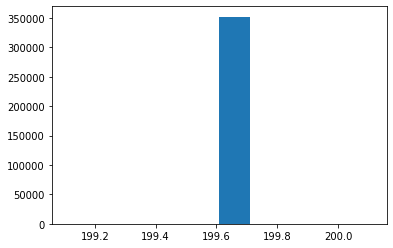

In [3]:
import matplotlib.pyplot as plt
plt.hist(vals)

# pacu 250 ECG에서 peak 뽑기

In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#상위 dir에 있는 파일 읽어오기
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr



#NRS_vital files들의 목록
vital_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz'
f_vital_list = os.listdir(vital_path)
vital_name = [vital[4:] for vital in f_vital_list]


non_ecg, non_ppg = 0, 0
long_ecg = 0
SRATE = 250
LEN_INPUT = 120
i = 4000
error_list = []

for f_vital in f_vital_list[4000:6000]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    
    #detecting peaks of ECG
    e_cache_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_2min/'+f_vital[4:]
    
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
        
    else:
        print('finding ECG peaks')
        if len(df_vital['ECG']) >= 5*60*SRATE:
            long_ecg += 1
            
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)
        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')

print('No ECG data:', non_ecg)

＃##Input 4001 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4002 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4003 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4004 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4005 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4006 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4007 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4008 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4009 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4010 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4011 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4012 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4013 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4014 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4015 /8318#

successfully saved ECG peaks
＃##Input 4119 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4120 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4121 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4122 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4123 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4124 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4125 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4126 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4127 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4128 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4129 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4130 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4131 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4132 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4237 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4238 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4239 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4240 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4241 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4242 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4243 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4244 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4245 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4246 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4247 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4248 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4249 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4250 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4355 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4356 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4357 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4358 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4359 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4360 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4361 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4362 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4363 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4364 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4365 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4366 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4367 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4368 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4472 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4473 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4474 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4475 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4476 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4477 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4478 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4479 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4480 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4481 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4482 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4483 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4484 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4485 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4590 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4591 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4592 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4593 /8318###
finding ECG peaks
에러발생: attempt to get argmin of an empty sequence
＃##Input 4594 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4595 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4596 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4597 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4598 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4599 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4600 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4601 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4602 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4603 /8318###
finding ECG peaks


successfully saved ECG peaks
＃##Input 4707 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4708 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4709 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4710 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4711 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4712 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4713 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4714 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4715 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4716 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4717 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4718 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4719 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4720 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4824 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4825 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4826 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4827 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4828 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4829 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4830 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4831 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4832 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4833 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4834 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4835 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4836 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4837 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4942 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4943 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4944 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4945 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4946 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4947 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4948 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4949 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4950 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4951 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4952 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4953 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4954 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4955 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5060 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5061 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5062 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5063 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5064 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5065 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5066 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5067 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5068 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5069 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5070 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5071 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5072 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5073 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5178 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5179 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5180 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5181 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5182 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5183 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5184 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5185 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5186 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5187 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5188 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5189 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5190 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5191 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5296 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5297 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5298 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5299 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5300 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5301 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5302 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5303 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5304 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5305 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5306 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5307 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5308 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5309 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5414 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5415 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5416 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5417 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5418 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5419 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5420 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5421 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5422 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5423 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5424 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5425 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5426 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5427 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5532 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5533 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5534 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5535 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5536 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5537 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5538 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5539 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5540 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5541 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5542 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5543 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5544 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5545 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5650 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5651 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5652 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5653 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5654 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5655 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5656 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5657 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5658 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5659 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5660 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5661 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5662 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5663 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5768 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5769 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5770 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5771 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5772 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5773 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5774 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5775 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5776 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5777 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5778 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5779 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5780 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5781 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5886 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5887 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5888 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5889 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5890 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5891 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5892 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5893 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5894 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5895 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5896 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5897 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5898 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5899 /8318###
finding ECG peaks
successfully saved E

# Detecting Peaks (201224)

In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 5000
for f_vital in vital_list[5000:7500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
            #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


            print('\ndetecting peak...', end='')
            minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')
        pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(5001/10075)  already existing ppg, ecg peaks6.0,6780,PACU1_1_200730_115233.vital
(5002/10075)  already existing ppg, ecg peaks7.0,7189,PACU1_7_200821_153936.vital
(5003/10075)  already existing ppg, ecg peaks4.0,8228,PACU1_9_201026_114513.vital
(5004/10075)  already existing ppg, ecg peaks8.0,2233,PACU1_8_190906_160323.vital
(5005/10075)  already existing ppg, ecg peaks6.0,7481,PACU1_3_200917_111241.vital
(5006/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5007/10075)  already existing ppg, ecg peaks5.0,4487,PACU1_3_200313_111818.vital
(5008/10075)  already existing ppg, ecg peaks4.0,4433,PACU1_1_200311_105006.vital
(5009/10075)  already existing ppg, ecg peaks5.0,4216,PACU1_3_200303_105459.vital
(5010/10075)  already existing ppg, ecg peaks3.0,4222,PACU1_11_200303_131125.vital
(5011/10075)  already existing ppg, ecg peaks4.0,8826,PACU1_9_190718_154644.vital
(5012/10075)  already existing ppg, ecg peaks5.0,7142,PACU1_3_200820_102200.vital
(5013/10075)  alread

completed...
(5107/10075)  
detecting peak...completed...
(5108/10075)  already existing ppg, ecg peaks7.0,5025,PACU1_6_200508_154519.vital
(5109/10075)  already existing ppg, ecg peaks5.0,9814,PACU1_3_200616_175017.vital
(5110/10075)  already existing ppg, ecg peaks7.0,6561,PACU1_1_200717_135329.vital
(5111/10075)  already existing ppg, ecg peaks4.0,10008,PACU1_3_200818_172716.vital
(5112/10075)  already existing ppg, ecg peaks4.0,2030,PACU1_12_190902_133048.vital
(5113/10075)  already existing ppg, ecg peaks4.0,9131,PACU1_1_191224_162516.vital
(5114/10075)  already existing ppg, ecg peaks5.0,1648,PACU1_10_190820_163322.vital
(5115/10075)  already existing ppg, ecg peaks7.0,2598,PACU1_1_191203_215005.vital
(5116/10075)  already existing ppg, ecg peaks7.0,8834,PACU1_12_190719_140025.vital
(5117/10075)  
detecting peak...completed...
(5118/10075)  already existing ppg, ecg peaks6.0,4695,PACU1_8_200320_115957.vital
(5119/10075)  
detecting peak...HR estimation failed, assume 75
completed

detecting peak...completed...
(5212/10075)  already existing ppg, ecg peaks4.0,582,PACU1_4_190523_142511.vital
(5213/10075)  already existing ppg, ecg peaks2.0,6971,PACU1_6_200811_145947.vital
(5214/10075)  already existing ppg, ecg peaks4.0,8620,PACU1_3_190514_162201.vital
(5215/10075)  
detecting peak...completed...
(5216/10075)  already existing ppg, ecg peaks6.0,794,PACU1_3_190604_002408.vital
(5217/10075)  already existing ppg, ecg peaks5.0,7226,PACU1_3_200826_112547.vital
(5218/10075)  already existing ppg, ecg peaks5.0,646,PACU1_3_190527_205639.vital
(5219/10075)  already existing ppg, ecg peaks5.0,1279,PACU1_2_190717_154349.vital
(5220/10075)  already existing ppg, ecg peaks8.0,167,PACU1_4_190430_114705.vital
(5221/10075)  already existing ppg, ecg peaks8.0,10007,PACU1_3_200818_172716.vital
(5222/10075)  already existing ppg, ecg peaks4.0,7764,PACU1_4_200929_102240.vital
(5223/10075)  
detecting peak...completed...
(5224/10075)  already existing ppg, ecg peaks5.0,3061,PACU1_7_2

detecting peak...completed...
(5320/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5321/10075)  already existing ppg, ecg peaks6.0,9092,PACU1_3_191018_153418.vital
(5322/10075)  already existing ppg, ecg peaks6.0,1115,PACU1_2_190710_171004.vital
(5323/10075)  already existing ppg, ecg peaks3.0,8236,PACU1_6_201026_163334.vital
(5324/10075)  already existing ppg, ecg peaks7.0,2490,PACU1_3_191021_160814.vital
(5325/10075)  already existing ppg, ecg peaks7.0,2347,PACU1_8_190911_135025.vital
(5326/10075)  already existing ppg, ecg peaks9.0,5146,PACU1_6_200514_145345.vital
(5327/10075)  already existing ppg, ecg peaks4.0,5966,PACU1_7_200617_105702.vital
(5328/10075)  already existing ppg, ecg peaks3.0,5894,PACU1_7_200615_164432.vital
(5329/10075)  already existing ppg, ecg peaks6.0,2202,PACU1_6_190906_093242.vital
(5330/10075)  
detecting peak...completed...
(5331/10075)  already existing ppg, ecg peaks5.0,5014,PACU1_10_200508_123320.vital
(5332/10075)  
detecting pe

detecting peak...completed...
(5435/10075)  already existing ppg, ecg peaks8.0,6975,PACU1_3_200811_163401.vital
(5436/10075)  already existing ppg, ecg peaks6.0,2948,PACU1_3_200111_190017.vital
(5437/10075)  already existing ppg, ecg peaks5.0,8238,PACU1_12_201026_164359.vital
(5438/10075)  already existing ppg, ecg peaks8.0,3624,PACU1_1_200210_210020.vital
(5439/10075)  already existing ppg, ecg peaks3.0,4187,PACU1_5_200302_164307.vital
(5440/10075)  already existing ppg, ecg peaks5.0,9357,PACU1_10_200207_183722.vital
(5441/10075)  already existing ppg, ecg peaks5.0,9410,PACU1_8_200220_100522.vital
(5442/10075)  already existing ppg, ecg peaks5.0,4567,PACU1_5_200317_182745.vital
(5443/10075)  
detecting peak...completed...
(5444/10075)  already existing ppg, ecg peaks2.0,9572,PACU1_3_200320_223434.vital
(5445/10075)  already existing ppg, ecg peaks4.0,3752,PACU1_1_200214_212645.vital
(5446/10075)  already existing ppg, ecg peaks6.0,1846,PACU1_3_190826_003738.vital
(5447/10075)  already

completed...
(5560/10075)  already existing ppg, ecg peaks7.0,5433,PACU1_6_200528_103014.vital
(5561/10075)  already existing ppg, ecg peaks4.0,570,PACU1_2_190523_090239.vital
(5562/10075)  already existing ppg, ecg peaks2.0,36,PACU1_2_190412_122750.vital
(5563/10075)  
detecting peak...completed...
(5564/10075)  already existing ppg, ecg peaks9.0,7717,PACU1_8_200925_174811.vital
(5565/10075)  already existing ppg, ecg peaks6.0,2503,PACU1_10_191022_103919.vital
(5566/10075)  already existing ppg, ecg peaks4.0,3326,PACU1_3_200129_142528.vital
(5567/10075)  already existing ppg, ecg peaks8.0,9238,PACU1_1_200116_175643.vital
(5568/10075)  already existing ppg, ecg peaks5.0,6439,PACU1_10_200714_173350.vital
(5569/10075)  already existing ppg, ecg peaks3.0,6444,PACU1_1_200714_194149.vital
(5570/10075)  already existing ppg, ecg peaks3.0,2338,PACU1_7_190911_092247.vital
(5571/10075)  already existing ppg, ecg peaks9.0,399,PACU1_8_190514_100124.vital
(5572/10075)  already existing ppg, ecg pe

completed...
(5668/10075)  already existing ppg, ecg peaks4.0,4143,PACU1_3_200302_112011.vital
(5669/10075)  already existing ppg, ecg peaks5.0,7688,PACU1_9_200925_091850.vital
(5670/10075)  already existing ppg, ecg peaks7.0,2820,PACU1_1_200107_164421.vital
(5671/10075)  already existing ppg, ecg peaks7.0,1513,PACU1_3_190816_152001.vital
(5672/10075)  already existing ppg, ecg peaks5.0,9638,PACU1_4_200508_084559.vital
(5673/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5674/10075)  already existing ppg, ecg peaks4.0,5939,PACU1_5_200616_153227.vital
(5675/10075)  already existing ppg, ecg peaks6.0,9348,PACU1_4_200207_102655.vital
(5676/10075)  already existing ppg, ecg peaks6.0,2731,PACU1_1_200103_000040.vital
(5677/10075)  already existing ppg, ecg peaks8.0,9916,PACU1_1_200715_193336.vital
(5678/10075)  already existing ppg, ecg peaks5.0,1259,PACU1_11_190717_093239.vital
(5679/10075)  already existing ppg, ecg peaks6.0,1747,PACU1_10_190821_164748.vital
(5680/

detecting peak...completed...
(5773/10075)  already existing ppg, ecg peaks7.0,417,PACU1_12_190514_121310.vital
(5774/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5775/10075)  
detecting peak...completed...
(5776/10075)  
detecting peak...completed...
(5777/10075)  already existing ppg, ecg peaks5.0,6986,PACU1_2_200811_214814.vital
(5778/10075)  already existing ppg, ecg peaks4.0,8688,PACU1_5_190529_144812.vital
(5779/10075)  already existing ppg, ecg peaks5.0,6411,PACU1_9_200714_120157.vital
(5780/10075)  already existing ppg, ecg peaks5.0,9310,PACU1_5_200130_183425.vital
(5781/10075)  already existing ppg, ecg peaks5.0,7036,PACU1_4_200813_215142.vital
(5782/10075)  already existing ppg, ecg peaks4.0,7622,PACU1_8_200923_121210.vital
(5783/10075)  already existing ppg, ecg peaks5.0,7387,PACU1_12_200914_135053.vital
(5784/10075)  already existing ppg, ecg peaks5.0,9872,PACU1_2_200702_162027.vital
(5785/10075)  already existing ppg, ecg peaks6.0,3847,PACU1_10_2

detecting peak...completed...
(5885/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5886/10075)  already existing ppg, ecg peaks6.0,5295,PACU1_8_200521_103754.vital
(5887/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5888/10075)  already existing ppg, ecg peaks3.0,6098,PACU1_7_200624_131520.vital
(5889/10075)  already existing ppg, ecg peaks5.0,4197,PACU1_2_200302_191153.vital
(5890/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(5891/10075)  already existing ppg, ecg peaks3.0,6086,PACU1_2_200623_223241.vital
(5892/10075)  already existing ppg, ecg peaks4.0,7419,PACU1_3_200916_012011.vital
(5893/10075)  already existing ppg, ecg peaks4.0,4954,PACU1_7_200506_174637.vital
(5894/10075)  already existing ppg, ecg peaks8.0,3821,PACU1_2_200218_185629.vital
(5895/10075)  already existing ppg, ecg peaks5.0,770,PACU1_2_190531_152222.vital
(5896/10075)  already existing ppg, ecg peaks7.0,8476,PACU1_5_200304_203013.vital
(5

completed...
(5996/10075)  already existing ppg, ecg peaks6.0,9582,PACU1_1_200324_180313.vital
(5997/10075)  already existing ppg, ecg peaks5.0,4295,PACU1_6_200305_145546.vital
(5998/10075)  already existing ppg, ecg peaks6.0,7144,PACU1_9_200820_105723.vital
(5999/10075)  already existing ppg, ecg peaks4.0,8933,PACU1_11_190822_145331.vital
(6000/10075)  already existing ppg, ecg peaks3.0,6886,PACU1_3_200805_153453.vital
(6001/10075)  already existing ppg, ecg peaks2.0,3887,PACU1_1_200219_211754.vital
(6002/10075)  already existing ppg, ecg peaks6.0,9431,PACU1_9_200225_172708.vital
(6003/10075)  already existing ppg, ecg peaks7.0,9062,PACU1_5_190911_210424.vital
(6004/10075)  already existing ppg, ecg peaks5.0,8875,PACU1_7_190816_172125.vital
(6005/10075)  already existing ppg, ecg peaks4.0,110,PACU1_4_190425_090356.vital
(6006/10075)  already existing ppg, ecg peaks2.0,5976,PACU1_6_200617_151008.vital
(6007/10075)  already existing ppg, ecg peaks6.0,9507,PACU1_1_200312_090051.vital
(60

(6104/10075)  
detecting peak...completed...
(6105/10075)  already existing ppg, ecg peaks3.0,3208,PACU1_3_200122_000657.vital
(6106/10075)  already existing ppg, ecg peaks5.0,10178,PACU1_6_201019_090059.vital
(6107/10075)  already existing ppg, ecg peaks5.0,3472,PACU1_3_200205_091000.vital
(6108/10075)  already existing ppg, ecg peaks7.0,4707,PACU1_8_200320_154240.vital
(6109/10075)  already existing ppg, ecg peaks4.0,3485,PACU1_6_200205_110527.vital
(6110/10075)  already existing ppg, ecg peaks5.0,8895,PACU1_1_190820_130519.vital
(6111/10075)  already existing ppg, ecg peaks5.0,3630,PACU1_3_200210_234348.vital
(6112/10075)  already existing ppg, ecg peaks4.0,9548,PACU1_4_200319_113448.vital
(6113/10075)  already existing ppg, ecg peaks7.0,10035,PACU1_4_200827_171402.vital
(6114/10075)  already existing ppg, ecg peaks5.0,9948,PACU1_8_200729_100108.vital
(6115/10075)  already existing ppg, ecg peaks7.0,5641,PACU1_7_200604_140101.vital
(6116/10075)  already existing ppg, ecg peaks7.0,43

completed...
(6209/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(6210/10075)  already existing ppg, ecg peaks7.0,8444,PACU1_5_200109_232630.vital
(6211/10075)  already existing ppg, ecg peaks5.0,8452,PACU1_2_200116_232616.vital
(6212/10075)  already existing ppg, ecg peaks5.0,9409,PACU1_7_200220_093909.vital
(6213/10075)  already existing ppg, ecg peaks4.0,8567,PACU1_3_190429_161843.vital
(6214/10075)  already existing ppg, ecg peaks4.0,3431,PACU1_6_200203_174857.vital
(6215/10075)  already existing ppg, ecg peaks4.0,5518,PACU1_1_200601_090827.vital
(6216/10075)  already existing ppg, ecg peaks5.0,7647,PACU1_5_200924_091559.vital
(6217/10075)  already existing ppg, ecg peaks6.0,9224,PACU1_1_200115_172636.vital
(6218/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(6219/10075)  already existing ppg, ecg peaks4.0,2730,PACU1_2_200102_203200.vital
(6220/10075)  already existing ppg, ecg peaks4.0,6752,PACU1_7_200729_084603.vital
(6221/10075) 

detecting peak...completed...
(6315/10075)  already existing ppg, ecg peaks6.0,6031,PACU1_9_200619_122810.vital
(6316/10075)  already existing ppg, ecg peaks8.0,7616,PACU1_1_200923_114746.vital
(6317/10075)  already existing ppg, ecg peaks8.0,5468,PACU1_10_200528_173638.vital
(6318/10075)  already existing ppg, ecg peaks7.0,2364,PACU1_4_190912_000138.vital
(6319/10075)  already existing ppg, ecg peaks5.0,2528,PACU1_1_191024_084238.vital
(6320/10075)  already existing ppg, ecg peaks10.0,5185,PACU1_3_200515_151431.vital
(6321/10075)  already existing ppg, ecg peaks8.0,1849,PACU1_7_190827_093740.vital
(6322/10075)  already existing ppg, ecg peaks5.0,4729,PACU1_8_200323_110833.vital
(6323/10075)  already existing ppg, ecg peaks4.0,8404,PACU1_6_190704_101313.vital
(6324/10075)  already existing ppg, ecg peaks5.0,3249,PACU1_5_200122_173618.vital
(6325/10075)  already existing ppg, ecg peaks5.0,6216,PACU1_9_200701_124558.vital
(6326/10075)  already existing ppg, ecg peaks8.0,5974,PACU1_4_2006

detecting peak...completed...
(6427/10075)  already existing ppg, ecg peaks7.0,10134,PACU1_4_201006_151048.vital
(6428/10075)  already existing ppg, ecg peaks7.0,2026,PACU1_3_190902_121654.vital
(6429/10075)  already existing ppg, ecg peaks8.0,3838,PACU1_4_200219_101817.vital
(6430/10075)  already existing ppg, ecg peaks7.0,9212,PACU1_3_200113_225449.vital
(6431/10075)  already existing ppg, ecg peaks8.0,5954,PACU1_3_200617_052740.vital
(6432/10075)  already existing ppg, ecg peaks2.0,3025,PACU1_3_200115_125339.vital
(6433/10075)  already existing ppg, ecg peaks3.0,5290,PACU1_7_200521_101406.vital
(6434/10075)  already existing ppg, ecg peaks3.0,196,PACU1_10_190502_113856.vital
(6435/10075)  already existing ppg, ecg peaks6.0,9115,PACU1_6_191119_112019.vital
(6436/10075)  already existing ppg, ecg peaks6.0,6637,PACU1_8_200722_144602.vital
(6437/10075)  already existing ppg, ecg peaks6.0,1598,PACU1_8_190820_120755.vital
(6438/10075)  already existing ppg, ecg peaks5.0,4817,PACU1_6_20032

completed...
(6532/10075)  already existing ppg, ecg peaks5.0,9918,PACU1_6_200716_102317.vital
(6533/10075)  already existing ppg, ecg peaks2.0,4400,PACU1_12_200310_131809.vital
(6534/10075)  already existing ppg, ecg peaks5.0,8993,PACU1_5_190902_164635.vital
(6535/10075)  already existing ppg, ecg peaks5.0,4253,PACU1_3_200304_134559.vital
(6536/10075)  already existing ppg, ecg peaks6.0,9465,PACU1_4_200304_005917.vital
(6537/10075)  already existing ppg, ecg peaks5.0,6014,PACU1_7_200618_171846.vital
(6538/10075)  already existing ppg, ecg peaks4.0,8779,PACU1_10_190709_172441.vital
(6539/10075)  already existing ppg, ecg peaks9.0,2668,PACU1_1_191224_101346.vital
(6540/10075)  already existing ppg, ecg peaks2.0,7537,PACU1_2_200918_163529.vital
(6541/10075)  already existing ppg, ecg peaks3.0,8419,PACU1_2_190726_143531.vital
(6542/10075)  already existing ppg, ecg peaks10.0,7571,PACU1_1_200921_215157.vital
(6543/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(6544

detecting peak...completed...
(6634/10075)  already existing ppg, ecg peaks7.0,3445,PACU1_5_200204_122544.vital
(6635/10075)  already existing ppg, ecg peaks7.0,9177,PACU1_4_200108_150835.vital
(6636/10075)  already existing ppg, ecg peaks2.0,259,PACU1_1_190503_150922.vital
(6637/10075)  already existing ppg, ecg peaks7.0,6843,PACU1_6_200803_175302.vital
(6638/10075)  already existing ppg, ecg peaks8.0,7928,PACU1_3_201008_183209.vital
(6639/10075)  already existing ppg, ecg peaks7.0,1871,PACU1_10_190827_134744.vital
(6640/10075)  already existing ppg, ecg peaks4.0,8230,PACU1_9_201026_135006.vital
(6641/10075)  already existing ppg, ecg peaks8.0,5659,PACU1_3_200604_191746.vital
(6642/10075)  already existing ppg, ecg peaks5.0,2029,PACU1_5_190902_132417.vital
(6643/10075)  already existing ppg, ecg peaks3.0,6347,PACU1_5_200708_142001.vital
(6644/10075)  
detecting peak...completed...
(6645/10075)  
detecting peak...completed...
(6646/10075)  already existing ppg, ecg peaks9.0,7807,PACU1_

completed...
(6743/10075)  already existing ppg, ecg peaks6.0,7439,PACU1_1_200916_124113.vital
(6744/10075)  already existing ppg, ecg peaks7.0,6737,PACU1_8_200728_111611.vital
(6745/10075)  already existing ppg, ecg peaks5.0,10084,PACU1_6_200921_164714.vital
(6746/10075)  already existing ppg, ecg peaks4.0,5016,PACU1_2_200508_130035.vital
(6747/10075)  already existing ppg, ecg peaks3.0,2113,PACU1_11_190904_133414.vital
(6748/10075)  already existing ppg, ecg peaks9.0,2514,PACU1_7_191023_084609.vital
(6749/10075)  already existing ppg, ecg peaks5.0,6825,PACU1_7_200731_155708.vital
(6750/10075)  already existing ppg, ecg peaks2.0,6050,PACU1_4_200622_131926.vital
(6751/10075)  already existing ppg, ecg peaks7.0,6823,PACU1_10_200731_154200.vital
(6752/10075)  already existing ppg, ecg peaks8.0,7501,PACU1_1_200917_171654.vital
(6753/10075)  already existing ppg, ecg peaks3.0,10179,PACU1_1_201019_174833.vital
(6754/10075)  already existing ppg, ecg peaks6.0,8669,PACU1_4_190523_210745.vital

detecting peak...completed...
(6857/10075)  already existing ppg, ecg peaks6.0,9272,PACU1_1_200121_143639.vital
(6858/10075)  already existing ppg, ecg peaks7.0,729,PACU1_6_190530_155803.vital
(6859/10075)  already existing ppg, ecg peaks6.0,610,PACU1_10_190524_122340.vital
(6860/10075)  already existing ppg, ecg peaks5.0,8549,PACU1_3_190415_203400.vital
(6861/10075)  already existing ppg, ecg peaks5.0,125,PACU1_5_190429_084323.vital
(6862/10075)  already existing ppg, ecg peaks5.0,6648,PACU1_1_200722_195028.vital
(6863/10075)  already existing ppg, ecg peaks3.0,8296,PACU1_9_201028_091733.vital
(6864/10075)  already existing ppg, ecg peaks5.0,3602,PACU1_5_200210_104932.vital
(6865/10075)  already existing ppg, ecg peaks3.0,254,PACU1_9_190503_134815.vital
(6866/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(6867/10075)  already existing ppg, ecg peaks4.0,6373,PACU1_5_200710_112415.vital
(6868/10075)  already existing ppg, ecg peaks8.0,4813,PACU1_3_200326_030550.

completed...
(6986/10075)  already existing ppg, ecg peaks5.0,10049,PACU1_9_200910_154403.vital
(6987/10075)  already existing ppg, ecg peaks6.0,9048,PACU1_8_190910_165227.vital
(6988/10075)  already existing ppg, ecg peaks7.0,8048,PACU1_7_201016_104515.vital
(6989/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(6990/10075)  already existing ppg, ecg peaks3.0,5712,PACU1_4_200608_114045.vital
(6991/10075)  already existing ppg, ecg peaks5.0,5636,PACU1_8_200604_121538.vital
(6992/10075)  already existing ppg, ecg peaks5.0,2770,PACU1_10_200103_173149.vital
(6993/10075)  already existing ppg, ecg peaks6.0,9655,PACU1_10_200513_145603.vital
(6994/10075)  already existing ppg, ecg peaks3.0,2915,PACU1_11_200110_100458.vital
(6995/10075)  already existing ppg, ecg peaks6.0,8961,PACU1_5_190828_103413.vital
(6996/10075)  already existing ppg, ecg peaks4.0,6773,PACU1_4_200729_200311.vital
(6997/10075)  already existing ppg, ecg peaks5.0,7254,PACU1_3_200901_093152.vital
(699

completed...
(7090/10075)  already existing ppg, ecg peaks3.0,3415,PACU1_2_200203_103023.vital
(7091/10075)  already existing ppg, ecg peaks4.0,591,PACU1_3_190523_183320.vital
(7092/10075)  already existing ppg, ecg peaks2.0,6464,PACU1_1_200715_114908.vital
(7093/10075)  already existing ppg, ecg peaks5.0,2044,PACU1_4_190902_215259.vital
(7094/10075)  already existing ppg, ecg peaks6.0,6010,PACU1_8_200618_165440.vital
(7095/10075)  already existing ppg, ecg peaks6.0,8592,PACU1_7_190503_180848.vital
(7096/10075)  already existing ppg, ecg peaks4.0,6029,PACU1_9_200619_122810.vital
(7097/10075)  already existing ppg, ecg peaks3.0,2007,PACU1_1_190830_151955.vital
(7098/10075)  already existing ppg, ecg peaks8.0,860,PACU1_5_190612_111821.vital
(7099/10075)  already existing ppg, ecg peaks7.0,2720,PACU1_11_200102_164424.vital
(7100/10075)  already existing ppg, ecg peaks4.0,9052,PACU1_7_190911_092247.vital
(7101/10075)  already existing ppg, ecg peaks5.0,818,PACU1_3_190611_025554.vital
(7102

completed...
(7304/10075)  already existing ppg, ecg peaks5.0,749,PACU1_2_190531_092313.vital
(7305/10075)  already existing ppg, ecg peaks5.0,9479,PACU1_1_200306_140229.vital
(7306/10075)  already existing ppg, ecg peaks5.0,2890,PACU1_6_200109_170925.vital
(7307/10075)  already existing ppg, ecg peaks8.0,8229,PACU1_11_201026_132629.vital
(7308/10075)  already existing ppg, ecg peaks8.0,553,PACU1_8_190517_130825.vital
(7309/10075)  already existing ppg, ecg peaks9.0,2459,PACU1_3_191018_140942.vital
(7310/10075)  already existing ppg, ecg peaks3.0,2467,PACU1_7_191018_152522.vital
(7311/10075)  already existing ppg, ecg peaks7.0,7092,PACU1_2_200818_191929.vital
(7312/10075)  already existing ppg, ecg peaks4.0,9147,PACU1_2_200103_090900.vital
(7313/10075)  already existing ppg, ecg peaks4.0,2012,PACU1_10_190830_154936.vital
(7314/10075)  already existing ppg, ecg peaks3.0,5838,PACU1_8_200612_093236.vital
(7315/10075)  already existing ppg, ecg peaks6.0,635,PACU1_3_190527_143739.vital
(731

detecting peak...completed...
(7408/10075)  already existing ppg, ecg peaks4.0,3915,PACU1_12_200220_162037.vital
(7409/10075)  already existing ppg, ecg peaks6.0,7143,PACU1_10_200820_103206.vital
(7410/10075)  already existing ppg, ecg peaks6.0,629,PACU1_1_190527_114929.vital
(7411/10075)  already existing ppg, ecg peaks7.0,3712,PACU1_4_200214_005121.vital
(7412/10075)  already existing ppg, ecg peaks5.0,843,PACU1_3_190611_182004.vital
(7413/10075)  already existing ppg, ecg peaks3.0,6874,PACU1_3_200805_095411.vital
(7414/10075)  already existing ppg, ecg peaks3.0,2642,PACU1_3_191219_161950.vital
(7415/10075)  already existing ppg, ecg peaks6.0,6770,PACU1_6_200729_183528.vital
(7416/10075)  already existing ppg, ecg peaks5.0,4238,PACU1_4_200304_091730.vital
(7417/10075)  already existing ppg, ecg peaks4.0,270,PACU1_12_190503_161631.vital
(7418/10075)  already existing ppg, ecg peaks4.0,2105,PACU1_2_190904_110057.vital
(7419/10075)  already existing ppg, ecg peaks3.0,4521,PACU1_4_200316

In [3]:
non_list

['3.0,111,PACU1_4_190425_090356.vital']

In [6]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 5000
for f_vital in vital_list[5000:7500]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            

            print('\ndetecting peak...', end='')
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')    
        pickle.dump(ecg_peak, open(ecg_cache, 'wb'))

(5001/10076)  already existing ppg, ecg peaks6.0,9721,PACU1_9_200528_094533.vital
(5002/10076)  already existing ppg, ecg peaks6.0,6780,PACU1_1_200730_115233.vital
(5003/10076)  already existing ppg, ecg peaks7.0,7189,PACU1_7_200821_153936.vital
(5004/10076)  already existing ppg, ecg peaks4.0,8228,PACU1_9_201026_114513.vital
(5005/10076)  already existing ppg, ecg peaks8.0,2233,PACU1_8_190906_160323.vital
(5006/10076)  already existing ppg, ecg peaks6.0,7481,PACU1_3_200917_111241.vital
(5007/10076)  
detecting peak...completed...
(5008/10076)  already existing ppg, ecg peaks5.0,4487,PACU1_3_200313_111818.vital
(5009/10076)  already existing ppg, ecg peaks4.0,4433,PACU1_1_200311_105006.vital
(5010/10076)  already existing ppg, ecg peaks5.0,4216,PACU1_3_200303_105459.vital
(5011/10076)  already existing ppg, ecg peaks3.0,4222,PACU1_11_200303_131125.vital
(5012/10076)  already existing ppg, ecg peaks4.0,8826,PACU1_9_190718_154644.vital
(5013/10076)  already existing ppg, ecg peaks5.0,714

(5118/10076)  
detecting peak...completed...
(5119/10076)  already existing ppg, ecg peaks6.0,4695,PACU1_8_200320_115957.vital
(5120/10076)  
detecting peak...completed...
(5121/10076)  already existing ppg, ecg peaks3.0,1726,PACU1_10_190821_140008.vital
(5122/10076)  already existing ppg, ecg peaks4.0,9491,PACU1_6_200310_121627.vital
(5123/10076)  already existing ppg, ecg peaks5.0,5453,PACU1_7_200528_153243.vital
(5124/10076)  already existing ppg, ecg peaks4.0,6246,PACU1_9_200702_140935.vital
(5125/10076)  already existing ppg, ecg peaks4.0,1452,PACU1_5_190723_160030.vital
(5126/10076)  already existing ppg, ecg peaks4.0,8183,PACU1_7_201022_115230.vital
(5127/10076)  already existing ppg, ecg peaks5.0,7903,PACU1_7_201008_130818.vital
(5128/10076)  already existing ppg, ecg peaks5.0,3957,PACU1_12_200221_140131.vital
(5129/10076)  already existing ppg, ecg peaks4.0,8226,PACU1_9_201026_114513.vital
(5130/10076)  
detecting peak...completed...
(5131/10076)  already existing ppg, ecg pea

(5229/10076)  
detecting peak...completed...
(5230/10076)  already existing ppg, ecg peaks4.0,7750,PACU1_2_200928_164616.vital
(5231/10076)  already existing ppg, ecg peaks5.0,6739,PACU1_6_200728_114638.vital
(5232/10076)  already existing ppg, ecg peaks8.0,6164,PACU1_5_200629_112456.vital
(5233/10076)  already existing ppg, ecg peaks4.0,9605,PACU1_10_200327_131020.vital
(5234/10076)  already existing ppg, ecg peaks3.0,9004,PACU1_6_190904_143103.vital
(5235/10076)  
detecting peak...completed...
(5236/10076)  already existing ppg, ecg peaks6.0,503,PACU1_10_190516_105854.vital
(5237/10076)  already existing ppg, ecg peaks8.0,4340,PACU1_10_200306_144514.vital
(5238/10076)  already existing ppg, ecg peaks6.0,10083,PACU1_3_200919_142513.vital
(5239/10076)  already existing ppg, ecg peaks3.0,2533,PACU1_1_191024_105656.vital
(5240/10076)  already existing ppg, ecg peaks3.0,5009,PACU1_9_200508_114612.vital
(5241/10076)  already existing ppg, ecg peaks5.0,7020,PACU1_3_200813_113717.vital
(5242

detecting peak...completed...
(5360/10076)  already existing ppg, ecg peaks8.0,8438,PACU1_3_191219_171049.vital
(5361/10076)  already existing ppg, ecg peaks5.0,1001,PACU1_12_190705_155226.vital
(5362/10076)  already existing ppg, ecg peaks5.0,9024,PACU1_4_190906_120059.vital
(5363/10076)  
detecting peak...completed...
(5364/10076)  already existing ppg, ecg peaks7.0,10094,PACU1_2_200924_002253.vital
(5365/10076)  
detecting peak...completed...
(5366/10076)  already existing ppg, ecg peaks3.0,136,PACU1_2_190429_121918.vital
(5367/10076)  already existing ppg, ecg peaks5.0,4536,PACU1_7_200316_154805.vital
(5368/10076)  already existing ppg, ecg peaks7.0,6909,PACU1_1_200806_140939.vital
(5369/10076)  already existing ppg, ecg peaks7.0,8644,PACU1_12_190516_145430.vital
(5370/10076)  already existing ppg, ecg peaks7.0,2404,PACU1_8_190917_182043.vital
(5371/10076)  already existing ppg, ecg peaks4.0,6769,PACU1_1_200729_175543.vital
(5372/10076)  already existing ppg, ecg peaks2.0,4438,PACU

(5472/10076)  
detecting peak...completed...
(5473/10076)  already existing ppg, ecg peaks5.0,3935,PACU1_8_200221_092533.vital
(5474/10076)  already existing ppg, ecg peaks7.0,9610,PACU1_3_200330_052532.vital
(5475/10076)  already existing ppg, ecg peaks4.0,4224,PACU1_5_200303_132745.vital
(5476/10076)  already existing ppg, ecg peaks5.0,3364,PACU1_12_200130_142153.vital
(5477/10076)  
detecting peak...completed...
(5478/10076)  already existing ppg, ecg peaks3.0,6651,PACU1_1_200723_095535.vital
(5479/10076)  already existing ppg, ecg peaks2.0,7591,PACU1_3_200922_140256.vital
(5480/10076)  already existing ppg, ecg peaks6.0,9643,PACU1_1_200511_170614.vital
(5481/10076)  already existing ppg, ecg peaks5.0,6568,PACU1_2_200717_152318.vital
(5482/10076)  already existing ppg, ecg peaks5.0,2466,PACU1_2_191018_152208.vital
(5483/10076)  already existing ppg, ecg peaks5.0,7360,PACU1_9_200911_160825.vital
(5484/10076)  
detecting peak...completed...
(5485/10076)  already existing ppg, ecg peak

(5581/10076)  
detecting peak...completed...
(5582/10076)  already existing ppg, ecg peaks7.0,3550,PACU1_3_200206_224128.vital
(5583/10076)  already existing ppg, ecg peaks4.0,9885,PACU1_9_200708_085948.vital
(5584/10076)  already existing ppg, ecg peaks6.0,7351,PACU1_3_200911_121317.vital
(5585/10076)  already existing ppg, ecg peaks2.0,6155,PACU1_2_200627_010322.vital
(5586/10076)  already existing ppg, ecg peaks8.0,447,PACU1_7_190515_093454.vital
(5587/10076)  already existing ppg, ecg peaks6.0,2990,PACU1_3_200114_125126.vital
(5588/10076)  already existing ppg, ecg peaks5.0,7835,PACU1_4_201006_185654.vital
(5589/10076)  already existing ppg, ecg peaks3.0,9922,PACU1_2_200716_123803.vital
(5590/10076)  already existing ppg, ecg peaks8.0,3065,PACU1_2_200116_102659.vital
(5591/10076)  
detecting peak...completed...
(5592/10076)  already existing ppg, ecg peaks5.0,8760,PACU1_11_190705_150937.vital
(5593/10076)  already existing ppg, ecg peaks6.0,9039,PACU1_1_190909_143818.vital
(5594/10

detecting peak...completed...
(5799/10076)  already existing ppg, ecg peaks5.0,9813,PACU1_6_200616_143649.vital
(5800/10076)  already existing ppg, ecg peaks7.0,2,PACU1_1_190408_202459.vital
(5801/10076)  already existing ppg, ecg peaks5.0,3776,PACU1_11_200217_130244.vital
(5802/10076)  already existing ppg, ecg peaks7.0,6640,PACU1_1_200722_154824.vital
(5803/10076)  already existing ppg, ecg peaks8.0,7422,PACU1_9_200916_092132.vital
(5804/10076)  already existing ppg, ecg peaks5.0,5734,PACU1_10_200609_095735.vital
(5805/10076)  already existing ppg, ecg peaks5.0,1077,PACU1_2_190709_192650.vital
(5806/10076)  already existing ppg, ecg peaks4.0,6490,PACU1_8_200715_174003.vital
(5807/10076)  already existing ppg, ecg peaks8.0,5497,PACU1_10_200529_151443.vital
(5808/10076)  already existing ppg, ecg peaks7.0,6304,PACU1_3_200707_025533.vital
(5809/10076)  already existing ppg, ecg peaks5.0,2660,PACU1_1_191220_200156.vital
(5810/10076)  already existing ppg, ecg peaks5.0,4510,PACU1_1_200313

detecting peak...completed...
(5908/10076)  already existing ppg, ecg peaks8.0,6330,PACU1_5_200707_184709.vital
(5909/10076)  already existing ppg, ecg peaks5.0,9415,PACU1_8_200220_161458.vital
(5910/10076)  already existing ppg, ecg peaks4.0,6003,PACU1_10_200618_124748.vital
(5911/10076)  already existing ppg, ecg peaks3.0,9712,PACU1_10_200527_105440.vital
(5912/10076)  already existing ppg, ecg peaks2.0,7296,PACU1_7_200909_102725.vital
(5913/10076)  
detecting peak...completed...
(5914/10076)  already existing ppg, ecg peaks5.0,6418,PACU1_7_200714_132234.vital
(5915/10076)  already existing ppg, ecg peaks4.0,5156,PACU1_3_200514_165347.vital
(5916/10076)  already existing ppg, ecg peaks4.0,2834,PACU1_9_200108_093229.vital
(5917/10076)  already existing ppg, ecg peaks5.0,7324,PACU1_10_200910_141630.vital
(5918/10076)  
detecting peak...completed...
(5919/10076)  
detecting peak...completed...
(5920/10076)  
detecting peak...completed...
(5921/10076)  already existing ppg, ecg peaks3.0,

detecting peak...completed...
(6024/10076)  already existing ppg, ecg peaks5.0,4291,PACU1_5_200305_131626.vital
(6025/10076)  already existing ppg, ecg peaks5.0,306,PACU1_5_190507_170516.vital
(6026/10076)  already existing ppg, ecg peaks5.0,8915,PACU1_4_190821_144052.vital
(6027/10076)  already existing ppg, ecg peaks8.0,4847,PACU1_5_200327_103404.vital
(6028/10076)  already existing ppg, ecg peaks8.0,2271,PACU1_1_190909_143818.vital
(6029/10076)  already existing ppg, ecg peaks6.0,6514,PACU1_12_200716_125232.vital
(6030/10076)  already existing ppg, ecg peaks5.0,4590,PACU1_11_200318_101443.vital
(6031/10076)  already existing ppg, ecg peaks5.0,3741,PACU1_4_200214_161101.vital
(6032/10076)  already existing ppg, ecg peaks5.0,1756,PACU1_2_190821_182822.vital
(6033/10076)  
detecting peak...completed...
(6034/10076)  
detecting peak...completed...
(6035/10076)  already existing ppg, ecg peaks4.0,4257,PACU1_11_200304_140422.vital
(6036/10076)  already existing ppg, ecg peaks4.0,1104,PACU

(6135/10076)  
detecting peak...completed...
(6136/10076)  already existing ppg, ecg peaks5.0,2799,PACU1_3_200107_090438.vital
(6137/10076)  already existing ppg, ecg peaks5.0,9012,PACU1_5_190905_113240.vital
(6138/10076)  
detecting peak...completed...
(6139/10076)  
detecting peak...completed...
(6140/10076)  
detecting peak...completed...
(6141/10076)  already existing ppg, ecg peaks3.0,2475,PACU1_6_191021_090139.vital
(6142/10076)  already existing ppg, ecg peaks6.0,3770,PACU1_1_200217_115421.vital
(6143/10076)  already existing ppg, ecg peaks3.0,1730,PACU1_3_190821_151404.vital
(6144/10076)  already existing ppg, ecg peaks3.0,5369,PACU1_1_200526_134717.vital
(6145/10076)  already existing ppg, ecg peaks5.0,9314,PACU1_2_200131_122752.vital
(6146/10076)  already existing ppg, ecg peaks5.0,8376,PACU1_10_201030_152701.vital
(6147/10076)  already existing ppg, ecg peaks6.0,5834,PACU1_6_200612_093033.vital
(6148/10076)  already existing ppg, ecg peaks5.0,8767,PACU1_5_190708_203133.vital

detecting peak...completed...
(6249/10076)  already existing ppg, ecg peaks6.0,6487,PACU1_11_200715_165207.vital
(6250/10076)  already existing ppg, ecg peaks5.0,3649,PACU1_11_200211_151628.vital
(6251/10076)  already existing ppg, ecg peaks4.0,5919,PACU1_2_200616_110607.vital
(6252/10076)  already existing ppg, ecg peaks8.0,1386,PACU1_10_190719_153001.vital
(6253/10076)  already existing ppg, ecg peaks9.0,7210,PACU1_4_200823_011008.vital
(6254/10076)  
detecting peak...completed...
(6255/10076)  already existing ppg, ecg peaks6.0,9834,PACU1_9_200619_134111.vital
(6256/10076)  
detecting peak...completed...
(6257/10076)  already existing ppg, ecg peaks7.0,9787,PACU1_1_200611_160159.vital
(6258/10076)  already existing ppg, ecg peaks8.0,587,PACU1_1_190523_174053.vital
(6259/10076)  already existing ppg, ecg peaks5.0,2852,PACU1_5_200108_153957.vital
(6260/10076)  already existing ppg, ecg peaks8.0,1537,PACU1_7_190816_172125.vital
(6261/10076)  
detecting peak...completed...
(6262/10076) 

(6379/10076)  
detecting peak...completed...
(6380/10076)  already existing ppg, ecg peaks5.0,7798,PACU1_5_201005_125031.vital
(6381/10076)  
detecting peak...completed...
(6382/10076)  already existing ppg, ecg peaks2.0,8364,PACU1_1_201030_141354.vital
(6383/10076)  already existing ppg, ecg peaks5.0,5516,PACU1_3_200531_144135.vital
(6384/10076)  already existing ppg, ecg peaks4.0,1630,PACU1_4_190820_155329.vital
(6385/10076)  already existing ppg, ecg peaks5.0,8778,PACU1_2_190709_163138.vital
(6386/10076)  already existing ppg, ecg peaks2.0,6911,PACU1_12_200806_143021.vital
(6387/10076)  already existing ppg, ecg peaks4.0,6452,PACU1_5_200715_093146.vital
(6388/10076)  already existing ppg, ecg peaks6.0,3985,PACU1_3_200221_224732.vital
(6389/10076)  already existing ppg, ecg peaks3.0,4284,PACU1_6_200305_101952.vital
(6390/10076)  already existing ppg, ecg peaks5.0,1660,PACU1_3_190820_162415.vital
(6391/10076)  already existing ppg, ecg peaks7.0,7702,PACU1_11_200925_130406.vital
(6392/

detecting peak...completed...
(6496/10076)  already existing ppg, ecg peaks7.0,4201,PACU1_3_200302_193839.vital
(6497/10076)  already existing ppg, ecg peaks7.0,9902,PACU1_1_200714_170705.vital
(6498/10076)  already existing ppg, ecg peaks5.0,4634,PACU1_1_200318_161331.vital
(6499/10076)  already existing ppg, ecg peaks6.0,964,PACU1_3_190704_163407.vital
(6500/10076)  already existing ppg, ecg peaks5.0,264,PACU1_3_190503_160256.vital
(6501/10076)  
detecting peak...completed...
(6502/10076)  already existing ppg, ecg peaks5.0,3498,PACU1_8_200205_125432.vital
(6503/10076)  already existing ppg, ecg peaks9.0,2899,PACU1_5_200109_200741.vital
(6504/10076)  already existing ppg, ecg peaks7.0,3524,PACU1_5_200206_105613.vital
(6505/10076)  already existing ppg, ecg peaks5.0,2833,PACU1_2_200108_092327.vital
(6506/10076)  already existing ppg, ecg peaks6.0,9668,PACU1_3_200515_122708.vital
(6507/10076)  already existing ppg, ecg peaks5.0,9631,PACU1_8_200507_132432.vital
(6508/10076)  already exi

(6634/10076)  
detecting peak...completed...
(6635/10076)  already existing ppg, ecg peaks7.0,3445,PACU1_5_200204_122544.vital
(6636/10076)  already existing ppg, ecg peaks7.0,9177,PACU1_4_200108_150835.vital
(6637/10076)  already existing ppg, ecg peaks2.0,259,PACU1_1_190503_150922.vital
(6638/10076)  already existing ppg, ecg peaks7.0,6843,PACU1_6_200803_175302.vital
(6639/10076)  already existing ppg, ecg peaks8.0,7928,PACU1_3_201008_183209.vital
(6640/10076)  already existing ppg, ecg peaks7.0,1871,PACU1_10_190827_134744.vital
(6641/10076)  already existing ppg, ecg peaks4.0,8230,PACU1_9_201026_135006.vital
(6642/10076)  already existing ppg, ecg peaks8.0,5659,PACU1_3_200604_191746.vital
(6643/10076)  already existing ppg, ecg peaks5.0,2029,PACU1_5_190902_132417.vital
(6644/10076)  already existing ppg, ecg peaks3.0,6347,PACU1_5_200708_142001.vital
(6645/10076)  
detecting peak...completed...
(6646/10076)  
detecting peak...completed...
(6647/10076)  already existing ppg, ecg peaks

detecting peak...completed...
(6744/10076)  already existing ppg, ecg peaks6.0,7439,PACU1_1_200916_124113.vital
(6745/10076)  already existing ppg, ecg peaks7.0,6737,PACU1_8_200728_111611.vital
(6746/10076)  already existing ppg, ecg peaks5.0,10084,PACU1_6_200921_164714.vital
(6747/10076)  already existing ppg, ecg peaks4.0,5016,PACU1_2_200508_130035.vital
(6748/10076)  already existing ppg, ecg peaks3.0,2113,PACU1_11_190904_133414.vital
(6749/10076)  already existing ppg, ecg peaks9.0,2514,PACU1_7_191023_084609.vital
(6750/10076)  already existing ppg, ecg peaks5.0,6825,PACU1_7_200731_155708.vital
(6751/10076)  already existing ppg, ecg peaks2.0,6050,PACU1_4_200622_131926.vital
(6752/10076)  already existing ppg, ecg peaks7.0,6823,PACU1_10_200731_154200.vital
(6753/10076)  already existing ppg, ecg peaks8.0,7501,PACU1_1_200917_171654.vital
(6754/10076)  already existing ppg, ecg peaks3.0,10179,PACU1_1_201019_174833.vital
(6755/10076)  already existing ppg, ecg peaks6.0,8669,PACU1_4_19

(6857/10076)  
detecting peak...completed...
(6858/10076)  already existing ppg, ecg peaks6.0,9272,PACU1_1_200121_143639.vital
(6859/10076)  already existing ppg, ecg peaks7.0,729,PACU1_6_190530_155803.vital
(6860/10076)  already existing ppg, ecg peaks6.0,610,PACU1_10_190524_122340.vital
(6861/10076)  already existing ppg, ecg peaks5.0,8549,PACU1_3_190415_203400.vital
(6862/10076)  already existing ppg, ecg peaks5.0,125,PACU1_5_190429_084323.vital
(6863/10076)  already existing ppg, ecg peaks5.0,6648,PACU1_1_200722_195028.vital
(6864/10076)  already existing ppg, ecg peaks3.0,8296,PACU1_9_201028_091733.vital
(6865/10076)  already existing ppg, ecg peaks5.0,3602,PACU1_5_200210_104932.vital
(6866/10076)  already existing ppg, ecg peaks3.0,254,PACU1_9_190503_134815.vital
(6867/10076)  
detecting peak...completed...
(6868/10076)  already existing ppg, ecg peaks4.0,6373,PACU1_5_200710_112415.vital
(6869/10076)  already existing ppg, ecg peaks8.0,4813,PACU1_3_200326_030550.vital
(6870/10076

detecting peak...completed...
(6987/10076)  already existing ppg, ecg peaks5.0,10049,PACU1_9_200910_154403.vital
(6988/10076)  already existing ppg, ecg peaks6.0,9048,PACU1_8_190910_165227.vital
(6989/10076)  already existing ppg, ecg peaks7.0,8048,PACU1_7_201016_104515.vital
(6990/10076)  
detecting peak...completed...
(6991/10076)  already existing ppg, ecg peaks3.0,5712,PACU1_4_200608_114045.vital
(6992/10076)  already existing ppg, ecg peaks5.0,5636,PACU1_8_200604_121538.vital
(6993/10076)  already existing ppg, ecg peaks5.0,2770,PACU1_10_200103_173149.vital
(6994/10076)  already existing ppg, ecg peaks6.0,9655,PACU1_10_200513_145603.vital
(6995/10076)  already existing ppg, ecg peaks3.0,2915,PACU1_11_200110_100458.vital
(6996/10076)  already existing ppg, ecg peaks6.0,8961,PACU1_5_190828_103413.vital
(6997/10076)  already existing ppg, ecg peaks4.0,6773,PACU1_4_200729_200311.vital
(6998/10076)  already existing ppg, ecg peaks5.0,7254,PACU1_3_200901_093152.vital
(6999/10076)  alrea

detecting peak...completed...
(7104/10076)  already existing ppg, ecg peaks7.0,8423,PACU1_11_190821_135008.vital
(7105/10076)  already existing ppg, ecg peaks3.0,5716,PACU1_7_200608_131503.vital
(7106/10076)  already existing ppg, ecg peaks6.0,1879,PACU1_8_190827_172707.vital
(7107/10076)  already existing ppg, ecg peaks5.0,2680,PACU1_1_191230_103900.vital
(7108/10076)  already existing ppg, ecg peaks2.0,710,PACU1_3_190529_152721.vital
(7109/10076)  already existing ppg, ecg peaks5.0,7739,PACU1_5_200928_154513.vital
(7110/10076)  already existing ppg, ecg peaks5.0,9526,PACU1_1_200316_175815.vital
(7111/10076)  already existing ppg, ecg peaks3.0,4026,PACU1_7_200225_093553.vital
(7112/10076)  already existing ppg, ecg peaks5.0,9402,PACU1_8_200219_150439.vital
(7113/10076)  already existing ppg, ecg peaks5.0,4874,PACU1_3_200330_104140.vital
(7114/10076)  already existing ppg, ecg peaks5.0,6466,PACU1_2_200715_120145.vital
(7115/10076)  already existing ppg, ecg peaks8.0,795,PACU1_4_190604_

detecting peak...completed...
(7211/10076)  already existing ppg, ecg peaks4.0,5890,PACU1_5_200615_151715.vital
(7212/10076)  already existing ppg, ecg peaks5.0,1111,PACU1_10_190710_161700.vital
(7213/10076)  already existing ppg, ecg peaks5.0,5370,PACU1_12_200526_135627.vital
(7214/10076)  already existing ppg, ecg peaks5.0,3202,PACU1_3_200121_193651.vital
(7215/10076)  already existing ppg, ecg peaks7.0,7152,PACU1_6_200820_172010.vital
(7216/10076)  already existing ppg, ecg peaks5.0,7262,PACU1_3_200901_144509.vital
(7217/10076)  already existing ppg, ecg peaks3.0,669,PACU1_1_190528_131707.vital
(7218/10076)  
detecting peak...completed...
(7219/10076)  already existing ppg, ecg peaks3.0,5224,PACU1_5_200518_153605.vital
(7220/10076)  already existing ppg, ecg peaks2.0,6524,PACU1_3_200716_162348.vital
(7221/10076)  already existing ppg, ecg peaks7.0,6068,PACU1_5_200623_124014.vital
(7222/10076)  already existing ppg, ecg peaks5.0,2848,PACU1_1_200108_141056.vital
(7223/10076)  already 

(7317/10076)  
detecting peak...completed...
(7318/10076)  already existing ppg, ecg peaks8.0,6062,PACU1_7_200623_102728.vital
(7319/10076)  already existing ppg, ecg peaks4.0,4938,PACU1_3_200501_002417.vital
(7320/10076)  already existing ppg, ecg peaks2.0,2582,PACU1_9_191127_163524.vital
(7321/10076)  already existing ppg, ecg peaks3.0,1954,PACU1_11_190829_135831.vital
(7322/10076)  already existing ppg, ecg peaks5.0,1923,PACU1_4_190828_165937.vital
(7323/10076)  already existing ppg, ecg peaks6.0,4622,PACU1_6_200318_143824.vital
(7324/10076)  already existing ppg, ecg peaks7.0,6908,PACU1_7_200806_114808.vital
(7325/10076)  already existing ppg, ecg peaks7.0,8316,PACU1_6_201028_153540.vital
(7326/10076)  already existing ppg, ecg peaks8.0,8908,PACU1_7_190821_104558.vital
(7327/10076)  already existing ppg, ecg peaks5.0,1618,PACU1_12_190820_142443.vital
(7328/10076)  already existing ppg, ecg peaks3.0,5650,PACU1_12_200604_165543.vital
(7329/10076)  already existing ppg, ecg peaks5.0,8

detecting peak...completed...
(7437/10076)  already existing ppg, ecg peaks5.0,6486,PACU1_9_200715_160746.vital
(7438/10076)  already existing ppg, ecg peaks5.0,1484,PACU1_2_190816_113113.vital
(7439/10076)  already existing ppg, ecg peaks5.0,3351,PACU1_1_200130_110625.vital
(7440/10076)  already existing ppg, ecg peaks5.0,9350,PACU1_12_200207_121642.vital
(7441/10076)  already existing ppg, ecg peaks3.0,3015,PACU1_3_200115_110924.vital
(7442/10076)  already existing ppg, ecg peaks5.0,8306,PACU1_1_201028_132155.vital
(7443/10076)  
detecting peak...completed...
(7444/10076)  already existing ppg, ecg peaks2.0,4498,PACU1_3_200313_140242.vital
(7445/10076)  already existing ppg, ecg peaks5.0,8357,PACU1_5_201030_103834.vital
(7446/10076)  already existing ppg, ecg peaks4.0,6228,PACU1_7_200701_174342.vital
(7447/10076)  already existing ppg, ecg peaks6.0,8604,PACU1_1_190509_172415.vital
(7448/10076)  
detecting peak...completed...
(7449/10076)  already existing ppg, ecg peaks7.5,977,PACU1_

# Preprocessing (201225)

In [4]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 5000
for f_vital in f_vital_list[5000:7500]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 8804')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_5000-7500', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 8804')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_5000-7500', 'wb'))


###Input 5001 / 8804: 5.0,7114,PACU1_1_200819_145226.vital###
###Input 5002 / 8804: 6.0,1352,PACU1_1_190718_202050.vital###
###Input 5003 / 8804: 6.0,3135,PACU1_3_200120_100745.vital###
###Input 5004 / 8804: 5.0,5124,PACU1_1_200513_212606.vital###
###Input 5005 / 8804: 6.0,7149,PACU1_9_200820_134020.vital###
###Input 5006 / 8804: 7.0,2289,PACU1_3_190910_094304.vital###
###Input 5007 / 8804: 4.0,3130,PACU1_3_200118_011438.vital###
###Input 5008 / 8804: 7.0,5964,PACU1_3_200617_095437.vital###
###Input 5009 / 8804: 5.0,10006,PACU1_11_200818_160429.vital###
###Input 5010 / 8804: 7.0,6449,PACU1_7_200715_084529.vital###
###Input 5011 / 8804: 7.0,14,PACU1_2_190409_220532.vital###
###Input 5012 / 8804: 5.0,5415,PACU1_7_200527_154344.vital###
###Input 5013 / 8804: 4.0,8876,PACU1_10_190816_173543.vital###
###Input 5014 / 8804: 4.0,9750,PACU1_1_200602_222624.vital###
###Input 5015 / 8804: 8.0,1946,PACU1_4_190829_124200.vital###
###Input 5016 / 8804: 8.0,5420,PACU1_9_200527_161023.vital###
###Inpu

###Input 5133 / 8804: 6.0,8858,PACU1_10_190816_121828.vital###
###Input 5134 / 8804: 5.0,3843,PACU1_8_200219_105917.vital###
###Input 5135 / 8804: 4.0,9308,PACU1_11_200130_133836.vital###
###Input 5136 / 8804: 5.0,2996,PACU1_4_200114_164130.vital###
###Input 5137 / 8804: 7.0,5614,PACU1_1_200603_165412.vital###
###Input 5138 / 8804: 6.0,8982,PACU1_5_190830_153112.vital###
###Input 5139 / 8804: 6.0,4002,PACU1_3_200224_125030.vital###
###Input 5140 / 8804: 5.0,5709,PACU1_7_200608_101827.vital###
###Input 5141 / 8804: 3.0,5856,PACU1_3_200612_162921.vital###
###Input 5142 / 8804: 6.0,5295,PACU1_8_200521_103754.vital###
###Input 5143 / 8804: 3.0,6098,PACU1_7_200624_131520.vital###
###Input 5144 / 8804: 5.0,4197,PACU1_2_200302_191153.vital###
###Input 5145 / 8804: 3.0,6086,PACU1_2_200623_223241.vital###
###Input 5146 / 8804: 4.0,7419,PACU1_3_200916_012011.vital###
###Input 5147 / 8804: 4.0,4954,PACU1_7_200506_174637.vital###
###Input 5148 / 8804: 8.0,3821,PACU1_2_200218_185629.vital###
###Inp

###Input 5265 / 8804: 7.0,9379,PACU1_1_200214_172703.vital###
###Input 5266 / 8804: 6.0,9854,PACU1_10_200626_154908.vital###
###Input 5267 / 8804: 5.0,5348,PACU1_11_200525_165009.vital###
###Input 5268 / 8804: 5.0,5389,PACU1_4_200526_223227.vital###
###Input 5269 / 8804: 4.0,2501,PACU1_7_191022_093516.vital###
###Input 5270 / 8804: 6.0,1242,PACU1_1_190716_190502.vital###
###Input 5271 / 8804: 5.0,623,PACU1_6_190527_094231.vital###
###Input 5272 / 8804: 7.0,418,PACU1_9_190514_122552.vital###
###Input 5273 / 8804: 6.0,5472,PACU1_1_200528_202422.vital###
###Input 5274 / 8804: 6.0,9592,PACU1_4_200325_182708.vital###
###Input 5275 / 8804: 4.0,6766,PACU1_12_200729_164628.vital###
###Input 5276 / 8804: 8.0,4739,PACU1_2_200323_185640.vital###


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 5277 / 8804: 7.0,7603,PACU1_8_200923_090419.vital###
###Input 5278 / 8804: 3.0,3489,PACU1_10_200205_120438.vital###
###Input 5279 / 8804: 6.0,10,PACU1_2_190409_171522.vital###
###Input 5280 / 8804: 5.0,10165,PACU1_4_201013_181313.vital###
###Input 5281 / 8804: 4.0,565,PACU1_3_190517_182617.vital###
###Input 5282 / 8804: 4.0,5764,PACU1_7_200610_091333.vital###
###Input 5283 / 8804: 3.0,7249,PACU1_3_200830_195222.vital###
###Input 5284 / 8804: 4.0,3984,PACU1_5_200221_181029.vital###
###Input 5285 / 8804: 5.0,9890,PACU1_3_200708_162912.vital###
###Input 5286 / 8804: 7.0,10118,PACU1_1_200926_140947.vital###
###Input 5287 / 8804: 8.0,8117,PACU1_1_201020_154542.vital###
###Input 5288 / 8804: 5.0,3170,PACU1_6_200121_115121.vital###
###Input 5289 / 8804: 5.0,7763,PACU1_6_200929_095106.vital###
###Input 5290 / 8804: 7.0,411,PACU1_4_190514_113852.vital###
###Input 5291 / 8804: 5.0,6778,PACU1_3_200730_101927.vital###
###Input 5292 / 8804: 5.0,8192,PACU1_4_201022_151412.vital###
###Input 

###Input 5408 / 8804: 5.0,8069,PACU1_11_201016_163355.vital###
###Input 5409 / 8804: 6.0,8809,PACU1_2_190716_094025.vital###
###Input 5410 / 8804: 5.0,8265,PACU1_4_201027_124103.vital###
###Input 5411 / 8804: 4.0,7124,PACU1_1_200819_181509.vital###
###Input 5412 / 8804: 7.0,8728,PACU1_5_190612_111821.vital###
###Input 5413 / 8804: 4.0,1004,PACU1_5_190705_170202.vital###
###Input 5414 / 8804: 7.0,2282,PACU1_10_190909_173215.vital###
###Input 5415 / 8804: 7.0,8444,PACU1_5_200109_232630.vital###
###Input 5416 / 8804: 5.0,8452,PACU1_2_200116_232616.vital###
###Input 5417 / 8804: 5.0,9409,PACU1_7_200220_093909.vital###
###Input 5418 / 8804: 4.0,8567,PACU1_3_190429_161843.vital###
###Input 5419 / 8804: 4.0,3431,PACU1_6_200203_174857.vital###
###Input 5420 / 8804: 4.0,5518,PACU1_1_200601_090827.vital###
###Input 5421 / 8804: 5.0,7647,PACU1_5_200924_091559.vital###
###Input 5422 / 8804: 6.0,9224,PACU1_1_200115_172636.vital###
###Input 5423 / 8804: 4.0,2730,PACU1_2_200102_203200.vital###
###Inp

###Input 5540 / 8804: 6.0,8786,PACU1_9_190710_121012.vital###
###Input 5541 / 8804: 4.0,5195,PACU1_6_200515_165154.vital###
###Input 5542 / 8804: 6.0,4931,PACU1_9_200331_174624.vital###
###Input 5543 / 8804: 4.0,1809,PACU1_4_190822_203857.vital###
###Input 5544 / 8804: 5.0,9288,PACU1_3_200123_211602.vital###
###Input 5545 / 8804: 8.0,8420,PACU1_1_190816_120435.vital###
###Input 5546 / 8804: 5.0,9690,PACU1_8_200522_100143.vital###
###Input 5547 / 8804: 5.0,3273,PACU1_10_200123_120738.vital###
###Input 5548 / 8804: 7.0,1122,PACU1_1_190710_200933.vital###
###Input 5549 / 8804: 8.0,1896,PACU1_5_190828_084127.vital###
###Input 5550 / 8804: 4.0,9082,PACU1_6_191017_090815.vital###
###Input 5551 / 8804: 5.0,5862,PACU1_11_200612_172810.vital###
###Input 5552 / 8804: 7.0,9213,PACU1_3_200113_225449.vital###
###Input 5553 / 8804: 5.0,1722,PACU1_11_190821_130056.vital###
###Input 5554 / 8804: 2.0,1393,PACU1_1_190719_182807.vital###
###Input 5555 / 8804: 5.0,3582,PACU1_3_200207_161931.vital###
###In

###Input 5672 / 8804: 5.0,2833,PACU1_2_200108_092327.vital###
###Input 5673 / 8804: 6.0,9668,PACU1_3_200515_122708.vital###
###Input 5674 / 8804: 5.0,9631,PACU1_8_200507_132432.vital###
###Input 5675 / 8804: 4.0,2337,PACU1_11_190911_094742.vital###
###Input 5676 / 8804: 7.0,1413,PACU1_3_190722_172548.vital###
###Input 5677 / 8804: 4.0,9040,PACU1_5_190909_153309.vital###
###Input 5678 / 8804: 6.0,9557,PACU1_3_200319_184726.vital###
###Input 5679 / 8804: 6.0,9330,PACU1_6_200203_125841.vital###
###Input 5680 / 8804: 6.0,9502,PACU1_4_200311_112253.vital###
###Input 5681 / 8804: 5.0,8677,PACU1_6_190528_063147.vital###
###Input 5682 / 8804: 3.0,4447,PACU1_4_200311_164625.vital###
###Input 5683 / 8804: 6.0,4564,PACU1_1_200317_163439.vital###
###Input 5684 / 8804: 5.0,8901,PACU1_5_190820_155117.vital###
###Input 5685 / 8804: 6.0,7766,PACU1_2_200929_112811.vital###
###Input 5686 / 8804: 7.0,9169,PACU1_5_200107_061342.vital###
###Input 5687 / 8804: 8.0,10145,PACU1_4_201008_134232.vital###
###Inp

###Input 5803 / 8804: 5.0,6232,PACU1_3_200701_182222.vital###
###Input 5804 / 8804: 3.0,9068,PACU1_7_190916_180634.vital###
###Input 5805 / 8804: 5.0,6676,PACU1_3_200724_100953.vital###
###Input 5806 / 8804: 6.0,7716,PACU1_6_200925_171451.vital###
###Input 5807 / 8804: 10.0,8412,PACU1_3_190715_233103.vital###
###Input 5808 / 8804: 5.0,3224,PACU1_5_200122_112025.vital###
###Input 5809 / 8804: 4.0,3554,PACU1_4_200207_093624.vital###
###Input 5810 / 8804: 5.0,5524,PACU1_3_200601_114514.vital###
###Input 5811 / 8804: 5.0,4317,PACU1_9_200306_104617.vital###
###Input 5812 / 8804: 5.0,4533,PACU1_7_200316_154805.vital###
###Input 5813 / 8804: 3.0,6410,PACU1_1_200714_112435.vital###
###Input 5814 / 8804: 4.0,465,PACU1_6_190515_135321.vital###
###Input 5815 / 8804: 7.0,6124,PACU1_5_200625_135857.vital###
###Input 5816 / 8804: 5.0,2529,PACU1_1_191024_084238.vital###
###Input 5817 / 8804: 8.0,8429,PACU1_1_190905_200145.vital###
###Input 5818 / 8804: 5.0,1440,PACU1_2_190723_112118.vital###
###Input

###Input 5935 / 8804: 5.0,8011,PACU1_2_201014_122936.vital###
###Input 5936 / 8804: 6.0,5324,PACU1_8_200522_134433.vital###
###Input 5937 / 8804: 2.0,1698,PACU1_1_190821_085554.vital###
###Input 5938 / 8804: 4.0,7796,PACU1_1_201005_105450.vital###
###Input 5939 / 8804: 5.0,6303,PACU1_3_200707_014617.vital###
###Input 5940 / 8804: 3.0,8667,PACU1_11_190523_160351.vital###
###Input 5941 / 8804: 3.0,7099,PACU1_7_200819_115421.vital###
###Input 5942 / 8804: 5.0,4932,PACU1_4_200331_204500.vital###
###Input 5943 / 8804: 4.0,4157,PACU1_7_200302_132132.vital###
###Input 5944 / 8804: 7.0,8369,PACU1_3_201030_151035.vital###
###Input 5945 / 8804: 5.0,3306,PACU1_9_200129_092229.vital###
###Input 5946 / 8804: 5.0,8800,PACU1_2_190715_094510.vital###
###Input 5947 / 8804: 5.0,1522,PACU1_2_190816_155203.vital###
###Input 5948 / 8804: 7.0,1074,PACU1_10_190709_172441.vital###
###Input 5949 / 8804: 1.0,1571,PACU1_4_190819_212205.vital###
###Input 5950 / 8804: 8.0,2013,PACU1_3_190830_163408.vital###
###Inp

###Input 6067 / 8804: 3.0,6240,PACU1_5_200702_083627.vital###
###Input 6068 / 8804: 5.0,9283,PACU1_10_200123_095532.vital###
###Input 6069 / 8804: 5.0,7577,PACU1_2_200922_024251.vital###
###Input 6070 / 8804: 5.0,6644,PACU1_1_200722_165853.vital###
###Input 6071 / 8804: 5.0,1412,PACU1_1_190722_162542.vital###
###Input 6072 / 8804: 5.0,5027,PACU1_6_200508_154519.vital###
###Input 6073 / 8804: 8.0,8849,PACU1_6_190723_162355.vital###
###Input 6074 / 8804: 6.0,9100,PACU1_3_191022_110815.vital###
###Input 6075 / 8804: 2.0,4402,PACU1_12_200310_131809.vital###
###Input 6076 / 8804: 3.0,3381,PACU1_2_200130_220200.vital###
###Input 6077 / 8804: 7.0,469,PACU1_11_190515_150348.vital###
###Input 6078 / 8804: 5.0,7346,PACU1_6_200911_112406.vital###
###Input 6079 / 8804: 8.0,5653,PACU1_8_200604_172550.vital###
###Input 6080 / 8804: 5.0,7414,PACU1_11_200915_164732.vital###
###Input 6081 / 8804: 6.0,7058,PACU1_8_200817_121744.vital###
###Input 6082 / 8804: 8.0,8927,PACU1_1_190821_172149.vital###
###In

###Input 6199 / 8804: 4.0,6029,PACU1_9_200619_122810.vital###
###Input 6200 / 8804: 3.0,2007,PACU1_1_190830_151955.vital###
dumping cache of d_preprocess - 6200 / 8804
###Input 6201 / 8804: 8.0,860,PACU1_5_190612_111821.vital###
###Input 6202 / 8804: 7.0,2720,PACU1_11_200102_164424.vital###
###Input 6203 / 8804: 4.0,9052,PACU1_7_190911_092247.vital###
###Input 6204 / 8804: 5.0,818,PACU1_3_190611_025554.vital###
###Input 6205 / 8804: 7.0,8423,PACU1_11_190821_135008.vital###
###Input 6206 / 8804: 3.0,5716,PACU1_7_200608_131503.vital###
###Input 6207 / 8804: 6.0,1879,PACU1_8_190827_172707.vital###
###Input 6208 / 8804: 5.0,2680,PACU1_1_191230_103900.vital###
###Input 6209 / 8804: 2.0,710,PACU1_3_190529_152721.vital###
###Input 6210 / 8804: 5.0,7739,PACU1_5_200928_154513.vital###
###Input 6211 / 8804: 5.0,9526,PACU1_1_200316_175815.vital###
###Input 6212 / 8804: 3.0,4026,PACU1_7_200225_093553.vital###
###Input 6213 / 8804: 5.0,9402,PACU1_8_200219_150439.vital###
###Input 6214 / 8804: 5.0,4

###Input 6330 / 8804: 5.0,8638,PACU1_1_190516_090804.vital###
###Input 6331 / 8804: 5.0,9148,PACU1_4_200103_103109.vital###
###Input 6332 / 8804: 6.0,8947,PACU1_6_190823_170306.vital###
###Input 6333 / 8804: 8.0,863,PACU1_6_190612_124844.vital###
###Input 6334 / 8804: 5.0,4588,PACU1_4_200318_095008.vital###
###Input 6335 / 8804: 4.0,7824,PACU1_1_201006_134011.vital###
###Input 6336 / 8804: 4.0,10204,PACU1_10_201023_163611.vital###
###Input 6337 / 8804: 5.0,10212,PACU1_5_201027_192835.vital###
###Input 6338 / 8804: 5.0,3675,PACU1_9_200213_110242.vital###
###Input 6339 / 8804: 7.0,2550,PACU1_2_191113_101501.vital###
###Input 6340 / 8804: 5.0,2641,PACU1_8_191219_160342.vital###
###Input 6341 / 8804: 5.0,4320,PACU1_7_200306_111720.vital###
###Input 6342 / 8804: 4.0,9094,PACU1_6_191018_155751.vital###
###Input 6343 / 8804: 8.0,1649,PACU1_11_190820_164140.vital###
###Input 6344 / 8804: 6.0,3034,PACU1_1_200115_154629.vital###
###Input 6345 / 8804: 3.0,1178,PACU1_7_190712_144218.vital###
###In

###Input 6462 / 8804: 5.0,8518,PACU1_6_200918_115950.vital###
###Input 6463 / 8804: 5.0,4109,PACU1_8_200228_150109.vital###
###Input 6464 / 8804: 3.0,2953,PACU1_2_200113_090329.vital###
###Input 6465 / 8804: 5.0,8217,PACU1_3_201023_235803.vital###
###Input 6466 / 8804: 2.0,5371,PACU1_9_200526_152346.vital###
###Input 6467 / 8804: 7.0,5427,PACU1_10_200527_171149.vital###
###Input 6468 / 8804: 3.0,1674,PACU1_3_190820_191402.vital###
###Input 6469 / 8804: 4.0,392,PACU1_3_190513_231431.vital###
###Input 6470 / 8804: 6.0,5622,PACU1_4_200603_185359.vital###
###Input 6471 / 8804: 8.0,3745,PACU1_3_200214_175828.vital###
###Input 6472 / 8804: 4.0,5887,PACU1_5_200615_134614.vital###
###Input 6473 / 8804: 4.0,2100,PACU1_1_190904_085158.vital###
###Input 6474 / 8804: 5.0,2023,PACU1_3_190831_001123.vital###
###Input 6475 / 8804: 4.0,3915,PACU1_12_200220_162037.vital###
###Input 6476 / 8804: 6.0,7143,PACU1_10_200820_103206.vital###
###Input 6477 / 8804: 6.0,629,PACU1_1_190527_114929.vital###
###Inpu

###Input 6594 / 8804: 5.0,7748,PACU1_8_200928_165311.vital###
###Input 6595 / 8804: 6.0,5595,PACU1_3_200603_125328.vital###
###Input 6596 / 8804: 5.0,3495,PACU1_7_200205_123217.vital###
###Input 6597 / 8804: 5.0,6837,PACU1_12_200803_143028.vital###
###Input 6598 / 8804: 7.0,2933,PACU1_1_200110_164438.vital###
###Input 6599 / 8804: 5.0,3241,PACU1_11_200122_160213.vital###
###Input 6600 / 8804: 5.0,3433,PACU1_5_200203_185025.vital###
dumping cache of d_preprocess - 6600 / 8804
###Input 6601 / 8804: 5.0,3390,PACU1_7_200131_095818.vital###
###Input 6602 / 8804: 5.0,7974,PACU1_11_201013_134512.vital###
###Input 6603 / 8804: 3.0,7643,PACU1_2_200923_213528.vital###
###Input 6604 / 8804: 4.0,543,PACU1_8_190517_115535.vital###
###Input 6605 / 8804: 6.0,9986,PACU1_3_200812_003444.vital###
###Input 6606 / 8804: 3.0,4908,PACU1_12_200331_111258.vital###
###Input 6607 / 8804: 5.0,1355,PACU1_2_190718_233548.vital###
###Input 6608 / 8804: 2.0,6929,PACU1_3_200809_234305.vital###
###Input 6609 / 8804: 6

###Input 6725 / 8804: 7.0,4962,PACU1_4_200507_084822.vital###
###Input 6726 / 8804: 5.0,6424,PACU1_7_200714_144955.vital###
###Input 6727 / 8804: 5.0,7882,PACU1_3_201008_015829.vital###
###Input 6728 / 8804: 3.0,1734,PACU1_10_190821_154935.vital###
###Input 6729 / 8804: 2.0,4318,PACU1_7_200306_111720.vital###
###Input 6730 / 8804: 5.0,2873,PACU1_6_200109_112046.vital###
###Input 6731 / 8804: 5.0,6253,PACU1_3_200702_175544.vital###
###Input 6732 / 8804: 5.0,6638,PACU1_8_200722_144602.vital###
###Input 6733 / 8804: 9.0,2687,PACU1_1_191231_164630.vital###
###Input 6734 / 8804: 3.0,5905,PACU1_1_200615_195658.vital###
###Input 6735 / 8804: 2.0,658,PACU1_10_190528_110437.vital###
###Input 6736 / 8804: 4.0,712,PACU1_3_190529_164508.vital###
###Input 6737 / 8804: 6.0,5443,PACU1_1_200528_134815.vital###
###Input 6738 / 8804: 5.0,4763,PACU1_1_200324_170236.vital###
###Input 6739 / 8804: 8.0,3689,PACU1_4_200213_144454.vital###
###Input 6740 / 8804: 5.0,2082,PACU1_4_190903_164828.vital###
###Input

###Input 6857 / 8804: 9.0,7252,PACU1_6_200831_070034.vital###
###Input 6858 / 8804: 8.0,1601,PACU1_1_190820_130519.vital###
###Input 6859 / 8804: 6.0,8503,PACU1_6_200608_171127.vital###
###Input 6860 / 8804: 8.0,2700,PACU1_5_200102_114119.vital###
###Input 6861 / 8804: 7.0,6754,PACU1_6_200729_094831.vital###
###Input 6862 / 8804: 3.0,4056,PACU1_1_200225_222355.vital###
###Input 6863 / 8804: 4.0,8177,PACU1_7_201022_102105.vital###
###Input 6864 / 8804: 2.0,801,PACU1_5_190607_122953.vital###
###Input 6865 / 8804: 7.0,8892,PACU1_12_190820_104238.vital###
###Input 6866 / 8804: 5.0,7005,PACU1_2_200812_134440.vital###
###Input 6867 / 8804: 6.0,9254,PACU1_7_200117_162124.vital###
###Input 6868 / 8804: 8.0,6052,PACU1_5_200622_153806.vital###
###Input 6869 / 8804: 7.0,665,PACU1_3_190528_121724.vital###
###Input 6870 / 8804: 7.0,9619,PACU1_3_200331_153124.vital###
###Input 6871 / 8804: 8.0,1320,PACU1_8_190718_142340.vital###
###Input 6872 / 8804: 2.0,5673,PACU1_10_200605_120556.vital###
###Input

###Input 6989 / 8804: 4.0,2628,PACU1_6_191219_153600.vital###
###Input 6990 / 8804: 3.0,8260,PACU1_12_201027_113752.vital###
###Input 6991 / 8804: 8.0,6401,PACU1_7_200714_101135.vital###
###Input 6992 / 8804: 4.0,2566,PACU1_6_191115_173935.vital###
###Input 6993 / 8804: 5.0,8500,PACU1_2_200602_234557.vital###
###Input 6994 / 8804: 6.0,9245,PACU1_3_200117_000917.vital###
###Input 6995 / 8804: 4.0,542,PACU1_7_190517_112655.vital###
###Input 6996 / 8804: 7.0,9941,PACU1_7_200724_130452.vital###
###Input 6997 / 8804: 3.0,4745,PACU1_9_200324_103207.vital###
###Input 6998 / 8804: 2.0,5678,PACU1_4_200605_141118.vital###
###Input 6999 / 8804: 6.0,2028,PACU1_1_190902_131344.vital###
###Input 7000 / 8804: 4.0,1491,PACU1_3_190816_122912.vital###
dumping cache of d_preprocess - 7000 / 8804
###Input 7001 / 8804: 4.0,6306,PACU1_8_200707_095145.vital###
###Input 7002 / 8804: 5.0,6687,PACU1_7_200724_140045.vital###
###Input 7003 / 8804: 8.0,1784,PACU1_2_190822_121952.vital###
###Input 7004 / 8804: 4.0,

###Input 7120 / 8804: 5.0,9567,PACU1_5_200320_140417.vital###
###Input 7121 / 8804: 6.0,143,PACU1_12_190429_133559.vital###
###Input 7122 / 8804: 4.0,9232,PACU1_5_200116_112703.vital###
###Input 7123 / 8804: 8.0,1665,PACU1_1_190820_170051.vital###
###Input 7124 / 8804: 4.0,3397,PACU1_5_200131_131659.vital###
###Input 7125 / 8804: 2.0,1774,PACU1_6_190822_092945.vital###
###Input 7126 / 8804: 5.0,8245,PACU1_1_201027_093124.vital###
###Input 7127 / 8804: 8.0,5490,PACU1_8_200529_122930.vital###
###Input 7128 / 8804: 6.0,8006,PACU1_1_201014_105405.vital###
###Input 7129 / 8804: 3.0,3545,PACU1_8_200206_181310.vital###
###Input 7130 / 8804: 6.0,7216,PACU1_2_200824_144409.vital###
###Input 7131 / 8804: 8.0,9908,PACU1_7_200715_094134.vital###
###Input 7132 / 8804: 7.0,4967,PACU1_5_200507_120955.vital###
###Input 7133 / 8804: 2.0,4390,PACU1_2_200310_093727.vital###
###Input 7134 / 8804: 7.0,998,PACU1_3_190705_152519.vital###
###Input 7135 / 8804: 9.0,1318,PACU1_7_190718_132645.vital###
###Input 

###Input 7252 / 8804: 8.0,1632,PACU1_5_190820_155117.vital###
###Input 7253 / 8804: 5.0,9771,PACU1_10_200608_165957.vital###
###Input 7254 / 8804: 8.0,3699,PACU1_5_200213_204559.vital###
###Input 7255 / 8804: 6.0,9077,PACU1_3_190917_152440.vital###
###Input 7256 / 8804: 7.0,4237,PACU1_4_200304_005917.vital###
###Input 7257 / 8804: 3.0,6818,PACU1_4_200731_151709.vital###
###Input 7258 / 8804: 9.0,3666,PACU1_7_200211_180059.vital###
###Input 7259 / 8804: 6.0,475,PACU1_1_190515_162501.vital###
###Input 7260 / 8804: 6.0,9863,PACU1_9_200701_103731.vital###
###Input 7261 / 8804: 7.0,7623,PACU1_9_200923_123547.vital###
###Input 7262 / 8804: 4.0,7985,PACU1_4_201013_174147.vital###
###Input 7263 / 8804: 3.0,437,PACU1_11_190514_154953.vital###
###Input 7264 / 8804: 3.0,7444,PACU1_3_200916_132318.vital###
###Input 7265 / 8804: 5.0,7685,PACU1_6_200925_084117.vital###
###Input 7266 / 8804: 4.0,4217,PACU1_2_200303_103554.vital###
###Input 7267 / 8804: 5.0,7432,PACU1_8_200916_112731.vital###
###Input

###Input 7384 / 8804: 8.0,4871,PACU1_3_200330_052532.vital###
###Input 7385 / 8804: 4.0,5344,PACU1_6_200525_154955.vital###
###Input 7386 / 8804: 5.0,7006,PACU1_3_200812_140415.vital###
###Input 7387 / 8804: 4.0,2494,PACU1_3_191021_201752.vital###
###Input 7388 / 8804: 5.0,8928,PACU1_1_190821_172149.vital###
###Input 7389 / 8804: 8.0,828,PACU1_3_190611_105333.vital###
###Input 7390 / 8804: 5.0,3683,PACU1_3_200213_132402.vital###
###Input 7391 / 8804: 4.0,6580,PACU1_3_200717_175105.vital###
###Input 7392 / 8804: 6.0,9670,PACU1_3_200515_122708.vital###
###Input 7393 / 8804: 8.0,3409,PACU1_1_200131_183024.vital###
###Input 7394 / 8804: 8.0,4383,PACU1_4_200309_171129.vital###
###Input 7395 / 8804: 6.0,3305,PACU1_6_200129_092739.vital###
###Input 7396 / 8804: 5.0,8974,PACU1_12_190829_124001.vital###
###Input 7397 / 8804: 5.0,7034,PACU1_1_200813_203135.vital###
###Input 7398 / 8804: 4.0,9208,PACU1_8_200113_100712.vital###
###Input 7399 / 8804: 5.0,4462,PACU1_7_200312_115154.vital###
###Input

In [8]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 2000
for f_vital in f_vital_list[2000:3000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    
    if f_vital in df_preprocess_prev['file_path'].tolist():
        df_preprocess.loc[f_num-1,'file_path'] = f_vital
        row = df_preprocess_prev[df_preprocess_prev['file_path']==f_vital]
        for i in range(n_aug):
            df_preprocess.loc[f_num-1, str(i+1)] = row[str(i+1)].values
        
        print('already done')
        continue
        
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_2000-3000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_2000-3000', 'wb'))


###Input 2001 / 10075: 5.0,2710,PACU1_7_200102_132235.vital###
already done
###Input 2002 / 10075: 6.0,8856,PACU1_4_190816_120851.vital###
###Input 2003 / 10075: 5.0,7381,PACU1_3_200913_000737.vital###
already done
###Input 2004 / 10075: 6.0,6236,PACU1_5_200701_210423.vital###
already done
###Input 2005 / 10075: 8.0,6388,PACU1_5_200710_154755.vital###
already done
###Input 2006 / 10075: 8.0,7550,PACU1_3_200919_142513.vital###
already done
###Input 2007 / 10075: 4.0,6612,PACU1_1_200721_163108.vital###
already done
###Input 2008 / 10075: 5.0,4151,PACU1_7_200302_122709.vital###
already done
###Input 2009 / 10075: 5.0,3543,PACU1_4_200206_170415.vital###
already done
###Input 2010 / 10075: 8.0,3453,PACU1_8_200204_145309.vital###
already done
###Input 2011 / 10075: 5.0,12,PACU1_2_190409_171522.vital###
already done
###Input 2012 / 10075: 5.0,9990,PACU1_7_200813_165138.vital###
already done
###Input 2013 / 10075: 5.0,2184,PACU1_4_190905_154911.vital###
###Input 2014 / 10075: 3.0,8136,PACU1_2_

###Input 2116 / 10075: 3.0,7705,PACU1_1_200925_135316.vital###
###Input 2117 / 10075: 4.0,1162,PACU1_4_190712_094849.vital###
###Input 2118 / 10075: 3.0,1787,PACU1_4_190822_143721.vital###
###Input 2119 / 10075: 2.0,3642,PACU1_3_200211_112038.vital###
already done
###Input 2120 / 10075: 6.0,1260,PACU1_3_190717_080810.vital###
already done
###Input 2121 / 10075: 3.0,5682,PACU1_11_200605_152145.vital###
already done
###Input 2122 / 10075: 5.0,1848,PACU1_3_190826_003738.vital###
###Input 2123 / 10075: 5.0,9927,PACU1_7_200717_162235.vital###
already done
###Input 2124 / 10075: 4.0,1621,PACU1_4_190820_150626.vital###
###Input 2125 / 10075: 6.0,7568,PACU1_2_200921_171750.vital###
###Input 2126 / 10075: 4.0,5931,PACU1_8_200616_143026.vital###
already done
###Input 2127 / 10075: 8.0,2838,PACU1_8_200108_101428.vital###
###Input 2128 / 10075: 6.0,8747,PACU1_10_190704_125218.vital###
already done
###Input 2129 / 10075: 7.0,7207,PACU1_3_200822_000636.vital###
already done
###Input 2130 / 10075: 5.

###Input 2232 / 10075: 3.0,3756,PACU1_3_200215_011040.vital###
already done
###Input 2233 / 10075: 5.0,1634,PACU1_7_190820_155740.vital###
###Input 2234 / 10075: 4.0,8427,PACU1_7_190828_090222.vital###
###Input 2235 / 10075: 5.0,4626,PACU1_3_200318_151154.vital###
already done
###Input 2236 / 10075: 2.0,5214,PACU1_5_200518_085723.vital###
already done
###Input 2237 / 10075: 3.0,335,PACU1_11_190509_155805.vital###
already done
###Input 2238 / 10075: 2.0,602,PACU1_3_190524_102857.vital###
already done
###Input 2239 / 10075: 5.0,6256,PACU1_2_200703_092105.vital###
###Input 2240 / 10075: 5.0,7822,PACU1_12_201006_124017.vital###
already done
###Input 2241 / 10075: 3.0,4513,PACU1_3_200313_233707.vital###
already done
###Input 2242 / 10075: 9.0,7726,PACU1_1_200926_140947.vital###
already done
###Input 2243 / 10075: 4.0,8658,PACU1_7_190517_121637.vital###
already done
###Input 2244 / 10075: 2.0,5331,PACU1_11_200522_153028.vital###
already done
###Input 2245 / 10075: 7.0,605,PACU1_10_190524_103

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 2292 / 10075: 3.0,1558,PACU1_10_190819_135024.vital###
###Input 2293 / 10075: 9.0,6221,PACU1_9_200701_153946.vital###
already done
###Input 2294 / 10075: 3.0,6372,PACU1_7_200710_114423.vital###
###Input 2295 / 10075: 6.0,9370,PACU1_9_200211_152643.vital###
already done
###Input 2296 / 10075: 5.0,1859,PACU1_10_190827_113303.vital###
###Input 2297 / 10075: 5.0,6856,PACU1_7_200804_134606.vital###
already done
###Input 2298 / 10075: 4.0,9057,PACU1_5_190911_152707.vital###
###Input 2299 / 10075: 4.0,3761,PACU1_5_200217_085155.vital###
already done
###Input 2300 / 10075: 6.0,8740,PACU1_2_190703_215330.vital###
already done
###Input 2301 / 10075: 2.0,4460,PACU1_1_200312_115612.vital###
already done
###Input 2302 / 10075: 2.0,7560,PACU1_1_200921_142848.vital###
already done
###Input 2303 / 10075: 4.0,9047,PACU1_10_190910_153828.vital###
###Input 2304 / 10075: 3.0,7586,PACU1_10_200922_123520.vital###
already done
###Input 2305 / 10075: 2.0,381,PACU1_10_190513_122929.vital###
###Input 2

###Input 2407 / 10075: 4.0,4264,PACU1_5_200304_160632.vital###
already done
###Input 2408 / 10075: 7.0,1502,PACU1_11_190816_135353.vital###
###Input 2409 / 10075: 2.0,5681,PACU1_11_200605_152145.vital###
already done
###Input 2410 / 10075: 5.0,8775,PACU1_1_190709_150603.vital###
already done
###Input 2411 / 10075: 6.0,1096,PACU1_2_190710_124742.vital###
already done
###Input 2412 / 10075: 5.0,9252,PACU1_3_200117_141933.vital###
already done
###Input 2413 / 10075: 4.0,3473,PACU1_5_200205_094457.vital###
already done
###Input 2414 / 10075: 5.0,7018,PACU1_4_200813_110634.vital###
###Input 2415 / 10075: 7.0,7310,PACU1_11_200910_104022.vital###
already done
###Input 2416 / 10075: 8.0,2463,PACU1_3_191018_153418.vital###
###Input 2417 / 10075: 5.0,9504,PACU1_1_200311_114252.vital###
already done
###Input 2418 / 10075: 6.0,7326,PACU1_10_200910_141630.vital###
already done
###Input 2419 / 10075: 3.0,6277,PACU1_4_200706_120958.vital###
already done
###Input 2420 / 10075: 5.0,2478,PACU1_3_191021_

###Input 2525 / 10075: 5.0,1964,PACU1_1_190829_160414.vital###
###Input 2526 / 10075: 5.0,5692,PACU1_8_200605_163631.vital###
already done
###Input 2527 / 10075: 3.0,4520,PACU1_4_200316_121843.vital###
already done
###Input 2528 / 10075: 7.0,4313,PACU1_3_200306_095345.vital###
already done
###Input 2529 / 10075: 4.0,4639,PACU1_10_200318_170131.vital###
already done
###Input 2530 / 10075: 3.0,3590,PACU1_7_200207_170300.vital###
already done
###Input 2531 / 10075: 5.0,10154,PACU1_9_201012_124403.vital###
already done
###Input 2532 / 10075: 6.0,7503,PACU1_5_200917_175256.vital###
already done
###Input 2533 / 10075: 7.0,6389,PACU1_2_200710_153500.vital###
already done
###Input 2534 / 10075: 5.0,4846,PACU1_5_200327_103404.vital###
already done
###Input 2535 / 10075: 3.0,739,PACU1_5_190530_202626.vital###
already done
###Input 2536 / 10075: 8.0,1081,PACU1_4_190709_220323.vital###
already done
###Input 2537 / 10075: 3.0,3290,PACU1_2_200127_094846.vital###
already done
###Input 2538 / 10075: 5

###Input 2642 / 10075: 3.0,4453,PACU1_3_200312_104029.vital###
###Input 2643 / 10075: 2.0,6621,PACU1_7_200722_091933.vital###
already done
###Input 2644 / 10075: 9.0,59,PACU1_3_190416_164009.vital###
already done
###Input 2645 / 10075: 5.0,6531,PACU1_3_200716_171108.vital###
already done
###Input 2646 / 10075: 5.0,8209,PACU1_2_201023_191347.vital###
already done
###Input 2647 / 10075: 6.0,2949,PACU1_3_200112_091555.vital###
already done
###Input 2648 / 10075: 4.0,6665,PACU1_10_200723_182451.vital###
already done
###Input 2649 / 10075: 2.0,5374,PACU1_3_200526_160710.vital###
###Input 2650 / 10075: 7.0,9868,PACU1_3_200701_203516.vital###
already done
###Input 2651 / 10075: 8.0,2818,PACU1_1_200107_164421.vital###
###Input 2652 / 10075: 6.0,9405,PACU1_9_200219_163641.vital###
already done
###Input 2653 / 10075: 8.0,3509,PACU1_2_200205_162341.vital###
###Input 2654 / 10075: 2.0,4853,PACU1_2_200327_140627.vital###
already done
###Input 2655 / 10075: 5.0,5520,PACU1_4_200601_104118.vital###
al

###Input 2760 / 10075: 6.0,8178,PACU1_5_201022_102913.vital###
already done
###Input 2761 / 10075: 2.0,816,PACU1_3_190609_013603.vital###
###Input 2762 / 10075: 3.0,8222,PACU1_3_201026_090931.vital###
already done
###Input 2763 / 10075: 3.0,5405,PACU1_7_200527_123142.vital###
already done
###Input 2764 / 10075: 2.0,7478,PACU1_5_200917_104825.vital###
already done
###Input 2765 / 10075: 7.0,7669,PACU1_7_200924_134504.vital###
already done
###Input 2766 / 10075: 5.0,7545,PACU1_3_200918_194952.vital###
already done
###Input 2767 / 10075: 7.0,8326,PACU1_4_201029_000016.vital###
already done
###Input 2768 / 10075: 5.0,6257,PACU1_2_200703_092105.vital###
already done
###Input 2769 / 10075: 4.0,9495,PACU1_11_200310_154610.vital###
already done
###Input 2770 / 10075: 5.0,10182,PACU1_10_201020_112317.vital###
already done
###Input 2771 / 10075: 3.0,7188,PACU1_8_200821_145903.vital###
already done
###Input 2772 / 10075: 5.0,6190,PACU1_12_200630_145042.vital###
already done
###Input 2773 / 10075:

###Input 2876 / 10075: 5.0,3576,PACU1_7_200207_142553.vital###
already done
###Input 2877 / 10075: 7.0,4207,PACU1_4_200302_203601.vital###
already done
###Input 2878 / 10075: 6.0,6762,PACU1_4_200729_141941.vital###
already done
###Input 2879 / 10075: 5.0,637,PACU1_1_190527_151400.vital###
already done
###Input 2880 / 10075: 2.0,2661,PACU1_1_191223_091942.vital###
###Input 2881 / 10075: 5.0,8964,PACU1_6_190828_105521.vital###
###Input 2882 / 10075: 5.0,3654,PACU1_6_200211_160851.vital###
already done
###Input 2883 / 10075: 5.0,2761,PACU1_1_200103_145718.vital###
already done
###Input 2884 / 10075: 2.0,7578,PACU1_4_200922_095009.vital###
###Input 2885 / 10075: 5.0,2978,PACU1_5_200113_191451.vital###
already done
###Input 2886 / 10075: 5.0,8480,PACU1_4_200306_090840.vital###
already done
###Input 2887 / 10075: 3.0,5667,PACU1_10_200605_094928.vital###
already done
###Input 2888 / 10075: 2.0,6366,PACU1_4_200710_084244.vital###
already done
###Input 2889 / 10075: 8.0,6219,PACU1_7_200701_1520

###Input 2989 / 10075: 3.0,4527,PACU1_11_200316_143403.vital###
already done
###Input 2990 / 10075: 6.0,2785,PACU1_6_200106_160435.vital###
already done
###Input 2991 / 10075: 5.0,349,PACU1_2_190509_175048.vital###
already done
###Input 2992 / 10075: 4.0,3694,PACU1_4_200213_174603.vital###
already done
###Input 2993 / 10075: 6.0,8943,PACU1_4_190823_142709.vital###
###Input 2994 / 10075: 7.0,5561,PACU1_1_200602_160011.vital###
already done
###Input 2995 / 10075: 6.0,3309,PACU1_11_200129_095707.vital###
already done
###Input 2996 / 10075: 4.0,5168,PACU1_3_200515_113730.vital###
###Input 2997 / 10075: 4.0,1373,PACU1_7_190719_133554.vital###
###Input 2998 / 10075: 6.0,4592,PACU1_7_200318_095702.vital###
already done
###Input 2999 / 10075: 6.0,2295,PACU1_5_190910_130631.vital###
###Input 3000 / 10075: 5.0,924,PACU1_3_190703_171251.vital###
already done
dumping cache of d_preprocess - 3000 / 10075


In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pyvital2 import arr


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)


# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)


### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
ecg_path = preprocess_path + 'vital_data/ECG_250Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


error_list = []
SRATE, f_num = 100, 1100
initial = f_num
interval = 300
for f_vital in f_vital_list[initial:initial+interval]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    df_ecg = pickle.load(open(ecg_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
    
    
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min_seg/" + f_vital    
    ecg_cache2 = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min_seg/" + f_vital
 
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg = df_vital_input['PPG'].tolist()
        seg_ecg = df_vital_input['ECG'].tolist()
        
        
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue
    
    
    
        ### 2. Noise 처리 ###
        # peak detection
        if os.path.exists(ppg_cache+'_{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')
            

        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                
            
            except Exception as e:
                print('error of', e)
                error_list.append(f_vital)
                df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
                continue
                
            
            if len(ppg_peak)==0:
                print('no peak')
                
                
            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')
            
        
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak
        
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue

            
        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        
        print('preprocessing done...', end='')
        
        
        
        # 전처리 성공한 case에 대해 lowess filter 적용
        if bool_pass:
            print('passed...lowess filtering...', end='')
            save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered/preprocess6/pacu_'+f_vital
            if os.path.exists(save_path+'_{}'.format(i+1)):
                print('already exists')
                continue
                
                
            start_idx = i*OVERLAP*250
            end_idx = (i*OVERLAP + LEN_INPUT)*250
            seg_ecg2 = df_ecg.loc[start_idx:end_idx-1]
            ecg_inp = seg_ecg2[['ECG']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            try:
                ecg_peak2 = arr.detect_qrs(ecg_inp, 250)
                
            except Exception as e:
                print('error on 250Hz peak:', e)
                
            else:
                pickle.dump(ecg_peak2, open(ecg_cache2+'_{}'.format(i+1),'wb'))
            
            
            ppg_inp = pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            #ppg_inp = signal.resample(ppg_inp, 250*LEN_INPUT)
            
            
            ppg_input = ppg_inp - smooth(ppg_inp)
            ecg_input = ecg_inp - smooth(ecg_inp)
                                        
            
            pickle.dump([ppg_input, ecg_input],  open(save_path+'_{}'.format(i+1), 'wb'))
            print('done')
            
    
        else:
            print('failed')
        

    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))

        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))


###Input 1101 / 10075: 8.0,6735,PACU1_8_200728_111611.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing do

  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1103 / 10075: 3.0,9007,PACU1_4_190904_200156.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preproces

  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...s

  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1107 / 10075: 5.0,4016,PACU1_4_200224_165734.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...prepr

  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 1110 / 10075: 6.0,4294,PACU1_9_200305_150455.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done..

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...s

  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...too less peaks
  segment 32...saved peak...too less peaks
  segment 33...saved peak...too less peaks
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preproc

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...s

  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...too less peaks
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...too less peaks
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...too less peaks
  segment 37...saved peak...too less peaks
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...too less peaks
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
 

  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...faile

  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...too less peaks
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...passed...low

  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1126 / 10075: 4.0,5211,PACU1_3_200516_061802.vital###
  segment 1...saved peak...too less peaks
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...too less peaks
  segment 4...saved peak...too less peaks
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done

  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...s

  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42too much missing data
  segment 43too much missing data
  segment 44too much missing data
  segment 45too much missing data
  segment 46too much missing data
  segment 47too much missing data
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 1131 / 10075: 6.0,10152,PACU1_7_201008_181134.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5t

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...save

  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...s

  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...s

  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1140 / 10075: 4.0,10164,PACU1_9_201013_162720.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess 

  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1142 / 10075: 5.0,7190,PACU1_2_200821_151109.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...too less peaks
  segment 19..

  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40too much missing data
  segment 41too much missing data
  segment 42too much missing data
  segment 43too much missing data
  segment 44too much missing data
  segment 45too much missing data
  segment 46too much missing data
  segment 47too much missing data
  segment 48too much missing data
  segment 49too much missing data
  segment 50too much missing data
  segment 51too mu

  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...s

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...save

  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...too less peaks
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...too less peaks
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...too less peaks
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...too less peaks
  segment 16...saved peak...too less peaks
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segmen

  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...passed...lowess fil

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak

  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...s

  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  s

  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1166 / 10075: 5.0,1382,PACU1_9_190719_142338.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18too much missing data
  segm

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocess

  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved p

  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...s

  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done..

  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...s

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...

  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1181 / 10075: 5.0,7879,PACU1_4_201008_004259.vital###
  segment 1...saved peak...too less peaks
  segment 2...saved peak...too less peaks
  segment 3...saved peak...too less peaks
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...too less peaks
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...faile

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing

  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32too much missing data
  segment 33too much missing data
  segment 34too much missing data
  segment 35too much missing data
  segment 36too much missing data
  segment 37too much missing data
  segment 38too much missing data
  segment 39too much missing data
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filteri

  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37

  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...too less peaks
  segment 30...saved peak...too less peaks
  segment 31...saved peak...too less peaks
  segment 32...saved peak...too less peaks
  segment 33...saved peak...too less peaks
  segment 34...saved peak...too less peaks
  segment 35...saved peak...too less peaks
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...too less peaks
  segment 41...saved peak...too less peaks
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...too less peaks
  segment 46...saved peak...too less peaks
  segment 47...saved pe

  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...s

  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak.

  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...prep

  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocess

  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36too much missing data
  segment 37too much missing data
  segment 38too much missing data
  segment 39too much missing data
  segment 40too much missing data
  segment 41too much missing data
  segment 42too much missing data
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved pea

  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42too much missing data
  segment 43too much missing data
  segment 44too much missing data
  segment 45too much missing data
  segment 46too much missing data
  segment 47too much missing data
  segment 48too much missing data
  segment 49too much missing data
  segment 50too much missing data
  segment 51too much missing data
  segment 52too much missing data
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 1202 / 10075: 3.0,7304,PACU1_3_200909_132401.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filt

  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17

  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved pea

  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1208 / 10075: 7.0,1760,PACU1_5_190821_201717.vital###
  segment 1...saved peak...preproce

  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...s

  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing 

  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocess

  segment 39...saved peak...too less peaks
  segment 40...saved peak...too less peaks
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...too less peaks
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...too less peaks
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...too less peaks
  segment 49too much missing data
  segment 50too much missing data
  segment 51too much missing data
  segment 52too much missing data
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 1216 / 10075: 3.0,9389,PACU1_1_200218_124917.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed.

  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1218 / 10075: 4.0,9951,PACU1_6_200729_183528.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...too less peaks
  segment 4...saved peak...too less peaks
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...too less peaks
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segme

  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segmen

  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...too less peaks
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1223 / 10075: 4.0,6266,PACU1_7_200703_145656.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preproce

  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...s

  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...s

  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lo

  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1232 / 10075: 4.0,5731,PACU1_4_200609_092831.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...prep

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...too less peaks
  segment 8...saved peak...too less peaks
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...too less peaks
  segment 11...saved peak...too less peaks
  segment 12...saved peak...too less peaks
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...too less peaks
  segment 18...saved peak...too less peaks
  segment 19...saved peak...too less peaks
  segment 20...saved peak...preprocessing done...

  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak

  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1242 / 10075: 7.0,3503,PACU1_10_200205_145216.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing

  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1244 / 10075: 7.0,7081,PACU1_4_200818_130212.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filt

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...too less peaks
  segment 6...saved peak...too less peaks
  segment 7...saved peak...too less peaks
  segment 8...saved peak...too less peaks
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...fail

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing don

  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1250 / 10075: 4.0,460,PACU1_1_190515_123546.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess fi

  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1252 / 10075: 4.0,7628,PACU1_3_200923_145130.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preproc

  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...too less peaks
  segment 21...saved peak...too less peaks
  segment 22...saved peak...too less peaks
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing d

  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done..

  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...s

  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...s

  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...s

  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...s

  segment 52too much missing data
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...too less peaks
###Input 1267 / 10075: 3.0,1493,PACU1_5_190816_125830.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed

  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...fai

  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done..

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...s

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...passed...lowess

  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...s

  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessin

  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1283 / 10075: 4.0,8679,PACU1_2_190528_110231.vital###
  segment 1...saved pea

  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...s

  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...too less peaks
  segment 17...saved peak...too less peaks
  segment 18...saved peak...too less peaks
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...too less p

  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  se

  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak.

  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55

  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...passed...lowess fil

  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...too less peaks
  segment 48...saved peak...too less peaks
  segment 49...saved peak...too less peaks
  segment 50...saved peak...too less peaks
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment 53...saved peak...too less peaks
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...too less peaks
  segment 56...saved peak...too less peaks
  segment 57...saved peak...too less peaks
###Input 1298 / 10075: 5.0,8035,PACU1_6_201014_172928.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessin

  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1300 / 10075: 4.0,8576,PACU1_3_190502_084551.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  

  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...s

  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done..

  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...failed
###Input 1307 / 10075: 2.0,4867,PACU1_2_200328_000912.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  seg

  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocess

  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24

  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  se

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessi

  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...pas

  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...s

  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...failed
  segment 23

  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1324 / 10075: 3.0,5120,PACU1_5_200513_183008.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing do

  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...s

  segment 57...saved peak...preprocessing done...failed
###Input 1328 / 10075: 3.0,6884,PACU1_1_200805_140602.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...prep

  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40too much missing data
  segment 41too mu

  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1333 / 10075: 2.0,7198,PACU1_2_200821_173602.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak.

  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess

  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56

  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...s

  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...pas

  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing 

  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocess

  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...fai

  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done..

  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...s

  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing 

  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segmen

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done.

  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...prepro

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...pa

  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...too less peaks
  segment 15...saved peak...too less peaks
  segment 16...saved peak...too less peaks
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing d

  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...too less peaks
  segment 28...saved peak...too less peaks
  segment 29...saved peak...too less peaks
  segment 30...saved peak...too less peaks
  segment 31...saved peak...too less peaks
  segment 32...saved peak...too less peaks
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...too less peaks
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak..

  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess fil

  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess

  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done..

  segment 53too much missing data
  segment 54too much missing data
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1377 / 10075: 5.0,4693,PACU1_8_200320_115957.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing 

  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done..

  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...too less peaks
  segment 5...saved peak...too less peaks
  segment 6...saved peak...too less peaks
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done.

  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...fai

  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...s

  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...s

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16.

  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing 

  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lo

  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...too less peaks
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...too less peaks
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 1398 / 10075: 8.0,6357,PACU1_3_200708_162912.vital###
  segment 1

  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 1400 / 10075: 5.0,8924,PACU1_1_190821_163312.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing do

In [4]:
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+100), 'wb'))


dumping cache of d_preprocess - 3100 / 10075
